# Lead Scoring Case Study

In [1335]:
import warnings 
warnings.filterwarnings('ignore')
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [1336]:
#reading the source file
df_leads=pd.read_csv(r'C:\Users\Hp\Desktop\machine learning\team lead scoring case study\Lead+Scoring+Case+Study\Lead Scoring Assignment\Leads.csv')

In [1337]:
# checking the dataframe 
df_leads.head()

,Prospect ID,Lead Number,Lead Origin,Lead Source,Do Not Email,Do Not Call,Converted,TotalVisits,Total Time Spent on Website,Page Views Per Visit,...,Get updates on DM Content,Lead Profile,City,Asymmetrique Activity Index,Asymmetrique Profile Index,Asymmetrique Activity Score,Asymmetrique Profile Score,I agree to pay the amount through cheque,A free copy of Mastering The Interview,Last Notable Activity
0,7927b2df-8bba-4d29-b9a2-b6e0beafe620,660737,API,Olark Chat,No,No,0,0.0,0,0.0,...,No,Select,Select,02.Medium,02.Medium,15.0,15.0,No,No,Modified
1,2a272436-5132-4136-86fa-dcc88c88f482,660728,API,Organic Search,No,No,0,5.0,674,2.5,...,No,Select,Select,02.Medium,02.Medium,15.0,15.0,No,No,Email Opened
2,8cc8c611-a219-4f35-ad23-fdfd2656bd8a,660727,Landing Page Submission,Direct Traffic,No,No,1,2.0,1532,2.0,...,No,Potential Lead,Mumbai,02.Medium,01.High,14.0,20.0,No,Yes,Email Opened
3,0cc2df48-7cf4-4e39-9de9-19797f9b38cc,660719,Landing Page Submission,Direct Traffic,No,No,0,1.0,305,1.0,...,No,Select,Mumbai,02.Medium,01.High,13.0,17.0,No,No,Modified
4,3256f628-e534-4826-9d63-4a8b88782852,660681,Landing Page Submission,Google,No,No,1,2.0,1428,1.0,...,No,Select,Mumbai,02.Medium,01.High,15.0,18.0,No,No,Modified


In [1338]:
df_leads

,Prospect ID,Lead Number,Lead Origin,Lead Source,Do Not Email,Do Not Call,Converted,TotalVisits,Total Time Spent on Website,Page Views Per Visit,...,Get updates on DM Content,Lead Profile,City,Asymmetrique Activity Index,Asymmetrique Profile Index,Asymmetrique Activity Score,Asymmetrique Profile Score,I agree to pay the amount through cheque,A free copy of Mastering The Interview,Last Notable Activity
0,7927b2df-8bba-4d29-b9a2-b6e0beafe620,660737,API,Olark Chat,No,No,0,0.0,0,0.00,...,No,Select,Select,02.Medium,02.Medium,15.0,15.0,No,No,Modified
1,2a272436-5132-4136-86fa-dcc88c88f482,660728,API,Organic Search,No,No,0,5.0,674,2.50,...,No,Select,Select,02.Medium,02.Medium,15.0,15.0,No,No,Email Opened
2,8cc8c611-a219-4f35-ad23-fdfd2656bd8a,660727,Landing Page Submission,Direct Traffic,No,No,1,2.0,1532,2.00,...,No,Potential Lead,Mumbai,02.Medium,01.High,14.0,20.0,No,Yes,Email Opened
3,0cc2df48-7cf4-4e39-9de9-19797f9b38cc,660719,Landing Page Submission,Direct Traffic,No,No,0,1.0,305,1.00,...,No,Select,Mumbai,02.Medium,01.High,13.0,17.0,No,No,Modified
4,3256f628-e534-4826-9d63-4a8b88782852,660681,Landing Page Submission,Google,No,No,1,2.0,1428,1.00,...,No,Select,Mumbai,02.Medium,01.High,15.0,18.0,No,No,Modified
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9235,19d6451e-fcd6-407c-b83b-48e1af805ea9,579564,Landing Page Submission,Direct Traffic,Yes,No,1,8.0,1845,2.67,...,No,Potential Lead,Mumbai,02.Medium,01.High,15.0,17.0,No,No,Email Marked Spam
9236,82a7005b-7196-4d56-95ce-a79f937a158d,579546,Landing Page Submission,Direct Traffic,No,No,0,2.0,238,2.00,...,No,Potential Lead,Mumbai,02.Medium,01.High,14.0,19.0,No,Yes,SMS Sent
9237,aac550fe-a586-452d-8d3c-f1b62c94e02c,579545,Landing Page Submission,Direct Traffic,Yes,No,0,2.0,199,2.00,...,No,Potential Lead,Mumbai,02.Medium,01.High,13.0,20.0,No,Yes,SMS Sent
9238,5330a7d1-2f2b-4df4-85d6-64ca2f6b95b9,579538,Landing Page Submission,Google,No,No,1,3.0,499,3.00,...,No,NaN,Other Metro Cities,02.Medium,02.Medium,15.0,16.0,No,No,SMS Sent


In [1339]:
df_leads.isnull().sum()

Prospect ID                                         0
Lead Number                                         0
Lead Origin                                         0
Lead Source                                        36
Do Not Email                                        0
Do Not Call                                         0
Converted                                           0
TotalVisits                                       137
Total Time Spent on Website                         0
Page Views Per Visit                              137
Last Activity                                     103
Country                                          2461
Specialization                                   1438
How did you hear about X Education               2207
What is your current occupation                  2690
What matters most to you in choosing a course    2709
Search                                              0
Magazine                                            0
Newspaper Article           

In [1340]:
#looking data types and null values in dataframe
df_leads.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9240 entries, 0 to 9239
Data columns (total 37 columns):
 #   Column                                         Non-Null Count  Dtype  
---  ------                                         --------------  -----  
 0   Prospect ID                                    9240 non-null   object 
 1   Lead Number                                    9240 non-null   int64  
 2   Lead Origin                                    9240 non-null   object 
 3   Lead Source                                    9204 non-null   object 
 4   Do Not Email                                   9240 non-null   object 
 5   Do Not Call                                    9240 non-null   object 
 6   Converted                                      9240 non-null   int64  
 7   TotalVisits                                    9103 non-null   float64
 8   Total Time Spent on Website                    9240 non-null   int64  
 9   Page Views Per Visit                           9103 

In [1341]:
#describing the dataframe to see various statistics
df_leads.describe()

,Lead Number,Converted,TotalVisits,Total Time Spent on Website,Page Views Per Visit,Asymmetrique Activity Score,Asymmetrique Profile Score
count,9240.000000,9240.000000,9103.000000,9240.000000,9103.000000,5022.000000,5022.000000
mean,617188.435606,0.385390,3.445238,487.698268,2.362820,14.306252,16.344883
std,23405.995698,0.486714,4.854853,548.021466,2.161418,1.386694,1.811395
min,579533.000000,0.000000,0.000000,0.000000,0.000000,7.000000,11.000000
25%,596484.500000,0.000000,1.000000,12.000000,1.000000,14.000000,15.000000
50%,615479.000000,0.000000,3.000000,248.000000,2.000000,14.000000,16.000000
75%,637387.250000,1.000000,5.000000,936.000000,3.000000,15.000000,18.000000
max,660737.000000,1.000000,251.000000,2272.000000,55.000000,18.000000,20.000000


## Cleaning the dataframe

In [1342]:
# converting all the values to lower case
for col in df_leads.columns:
    df_leads[col]=df_leads[col].apply(lambda i:i.lower() if type(i)==str else i)
       # if type(i)==str:
        #    i=i.lower()

In [1343]:

df_leads.head()

,Prospect ID,Lead Number,Lead Origin,Lead Source,Do Not Email,Do Not Call,Converted,TotalVisits,Total Time Spent on Website,Page Views Per Visit,...,Get updates on DM Content,Lead Profile,City,Asymmetrique Activity Index,Asymmetrique Profile Index,Asymmetrique Activity Score,Asymmetrique Profile Score,I agree to pay the amount through cheque,A free copy of Mastering The Interview,Last Notable Activity
0,7927b2df-8bba-4d29-b9a2-b6e0beafe620,660737,api,olark chat,no,no,0,0.0,0,0.0,...,no,select,select,02.medium,02.medium,15.0,15.0,no,no,modified
1,2a272436-5132-4136-86fa-dcc88c88f482,660728,api,organic search,no,no,0,5.0,674,2.5,...,no,select,select,02.medium,02.medium,15.0,15.0,no,no,email opened
2,8cc8c611-a219-4f35-ad23-fdfd2656bd8a,660727,landing page submission,direct traffic,no,no,1,2.0,1532,2.0,...,no,potential lead,mumbai,02.medium,01.high,14.0,20.0,no,yes,email opened
3,0cc2df48-7cf4-4e39-9de9-19797f9b38cc,660719,landing page submission,direct traffic,no,no,0,1.0,305,1.0,...,no,select,mumbai,02.medium,01.high,13.0,17.0,no,no,modified
4,3256f628-e534-4826-9d63-4a8b88782852,660681,landing page submission,google,no,no,1,2.0,1428,1.0,...,no,select,mumbai,02.medium,01.high,15.0,18.0,no,no,modified


In [1344]:
#converting all the 'select' into Nan values
df_leads=df_leads.replace('select',np.nan)

In [1345]:
#Now we nedd to check that if a column has only one unique value...beacuse this won't affect our analysis
df_leads.nunique()

Prospect ID                                      9240
Lead Number                                      9240
Lead Origin                                         5
Lead Source                                        20
Do Not Email                                        2
Do Not Call                                         2
Converted                                           2
TotalVisits                                        41
Total Time Spent on Website                      1731
Page Views Per Visit                              114
Last Activity                                      17
Country                                            38
Specialization                                     18
How did you hear about X Education                  9
What is your current occupation                     6
What matters most to you in choosing a course       3
Search                                              2
Magazine                                            1
Newspaper Article           

In [1346]:
#Dropping These columns because they have mostly unique values
df_leads= df_leads.drop(['Magazine','Receive More Updates About Our Courses','Update me on Supply Chain Content','Get updates on DM Content','I agree to pay the amount through cheque'],axis=1)

In [1347]:
df_leads.nunique()

Prospect ID                                      9240
Lead Number                                      9240
Lead Origin                                         5
Lead Source                                        20
Do Not Email                                        2
Do Not Call                                         2
Converted                                           2
TotalVisits                                        41
Total Time Spent on Website                      1731
Page Views Per Visit                              114
Last Activity                                      17
Country                                            38
Specialization                                     18
How did you hear about X Education                  9
What is your current occupation                     6
What matters most to you in choosing a course       3
Search                                              2
Newspaper Article                                   2
X Education Forums          

In [1348]:
# checking the missing value percentage
round((df_leads.isnull().sum()/len(df_leads['Prospect ID']))*100,2)

Prospect ID                                       0.00
Lead Number                                       0.00
Lead Origin                                       0.00
Lead Source                                       0.39
Do Not Email                                      0.00
Do Not Call                                       0.00
Converted                                         0.00
TotalVisits                                       1.48
Total Time Spent on Website                       0.00
Page Views Per Visit                              1.48
Last Activity                                     1.11
Country                                          26.63
Specialization                                   36.58
How did you hear about X Education               78.46
What is your current occupation                  29.11
What matters most to you in choosing a course    29.32
Search                                            0.00
Newspaper Article                                 0.00
X Educatio

In [1349]:
# dropping columns having missing values more than 35%
df_leads=df_leads.drop(['How did you hear about X Education','Tags','Lead Quality','Lead Profile','City','Asymmetrique Activity Index','Asymmetrique Profile Index','Asymmetrique Activity Score','Asymmetrique Profile Score'],axis=1)

In [1350]:
# checking the missing value percentage
round((df_leads.isnull().sum()/len(df_leads['Prospect ID']))*100,2)

Prospect ID                                       0.00
Lead Number                                       0.00
Lead Origin                                       0.00
Lead Source                                       0.39
Do Not Email                                      0.00
Do Not Call                                       0.00
Converted                                         0.00
TotalVisits                                       1.48
Total Time Spent on Website                       0.00
Page Views Per Visit                              1.48
Last Activity                                     1.11
Country                                          26.63
Specialization                                   36.58
What is your current occupation                  29.11
What matters most to you in choosing a course    29.32
Search                                            0.00
Newspaper Article                                 0.00
X Education Forums                                0.00
Newspaper 

In [1351]:
#We still have columns which have near 30% null values but these seems to be important columns so we will replace this null values with 'no data' place holder so that it becomes another category and we don't loose any data
df_leads['Country']=df_leads['Country'].fillna('no data')

In [1352]:
#We still have columns which have near 30% null values but these seems to be important columns so we will replace this null values with 'no data' place holder so that it becomes another category and we don't loose any data
df_leads['Specialization']=df_leads['Specialization'].fillna('no data')

In [1353]:
#We still have columns which have near 30% null values but these seems to be important columns so we will replace this null values with 'no data' place holder so that it becomes another category and we don't loose any data
df_leads['What is your current occupation']=df_leads['What is your current occupation'].fillna('no data')

In [1354]:
#We still have columns which have near 30% null values but these seems to be important columns so we will replace this null values with 'no data' place holder so that it becomes another category and we don't loose any data
df_leads['What matters most to you in choosing a course']=df_leads['What matters most to you in choosing a course'].fillna('no data')

In [1355]:
df_leads[df_leads['Country']=='no data']

,Prospect ID,Lead Number,Lead Origin,Lead Source,Do Not Email,Do Not Call,Converted,TotalVisits,Total Time Spent on Website,Page Views Per Visit,...,What is your current occupation,What matters most to you in choosing a course,Search,Newspaper Article,X Education Forums,Newspaper,Digital Advertisement,Through Recommendations,A free copy of Mastering The Interview,Last Notable Activity
0,7927b2df-8bba-4d29-b9a2-b6e0beafe620,660737,api,olark chat,no,no,0,0.0,0,0.0,...,unemployed,better career prospects,no,no,no,no,no,no,no,modified
5,2058ef08-2858-443e-a01f-a9237db2f5ce,660680,api,olark chat,no,no,0,0.0,0,0.0,...,no data,no data,no,no,no,no,no,no,no,modified
7,20ef72a2-fb3b-45e0-924e-551c5fa59095,660664,api,olark chat,no,no,0,0.0,0,0.0,...,no data,no data,no,no,no,no,no,no,no,modified
16,3abb7c77-1634-4083-9a9f-861068220611,660540,api,olark chat,no,no,0,0.0,0,0.0,...,no data,no data,no,no,no,no,no,no,no,modified
47,3f04fd93-2884-45f6-a4fc-f3b6f234554b,660153,api,olark chat,no,no,0,0.0,0,0.0,...,no data,no data,no,no,no,no,no,no,no,modified
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9187,4f465f71-1946-414e-9716-4847c60606e8,579979,api,olark chat,no,no,1,0.0,0,0.0,...,no data,no data,no,no,no,no,no,no,no,sms sent
9193,04b36f06-8e3e-4c99-9112-f162a2d1efc6,579926,landing page submission,direct traffic,no,no,0,3.0,50,3.0,...,unemployed,better career prospects,no,no,no,no,no,no,yes,sms sent
9199,6eb89ae5-d1e0-4c19-8661-8f9545e0e408,579892,api,olark chat,no,no,0,0.0,0,0.0,...,unemployed,better career prospects,no,no,no,no,no,no,no,modified
9217,b8872c12-7534-498d-8f4a-e79a19516db1,579786,api,olark chat,no,no,0,0.0,0,0.0,...,unemployed,better career prospects,no,no,no,no,no,no,no,sms sent


In [1356]:
round((df_leads.isnull().sum()/len(df_leads['Prospect ID']))*100,2)

Prospect ID                                      0.00
Lead Number                                      0.00
Lead Origin                                      0.00
Lead Source                                      0.39
Do Not Email                                     0.00
Do Not Call                                      0.00
Converted                                        0.00
TotalVisits                                      1.48
Total Time Spent on Website                      0.00
Page Views Per Visit                             1.48
Last Activity                                    1.11
Country                                          0.00
Specialization                                   0.00
What is your current occupation                  0.00
What matters most to you in choosing a course    0.00
Search                                           0.00
Newspaper Article                                0.00
X Education Forums                               0.00
Newspaper                   

In [1357]:
df_leads.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9240 entries, 0 to 9239
Data columns (total 23 columns):
 #   Column                                         Non-Null Count  Dtype  
---  ------                                         --------------  -----  
 0   Prospect ID                                    9240 non-null   object 
 1   Lead Number                                    9240 non-null   int64  
 2   Lead Origin                                    9240 non-null   object 
 3   Lead Source                                    9204 non-null   object 
 4   Do Not Email                                   9240 non-null   object 
 5   Do Not Call                                    9240 non-null   object 
 6   Converted                                      9240 non-null   int64  
 7   TotalVisits                                    9103 non-null   float64
 8   Total Time Spent on Website                    9240 non-null   int64  
 9   Page Views Per Visit                           9103 

In [1358]:
#checking different values in Lead origin
df_leads['Lead Origin'].value_counts()

landing page submission    4886
api                        3580
lead add form               718
lead import                  55
quick add form                1
Name: Lead Origin, dtype: int64

In [1359]:
#checking different values in Lead souce
df_leads['Lead Source'].value_counts()

google               2873
direct traffic       2543
olark chat           1755
organic search       1154
reference             534
welingak website      142
referral sites        125
facebook               55
bing                    6
click2call              4
social media            2
live chat               2
press_release           2
pay per click ads       1
blog                    1
welearn                 1
welearnblog_home        1
youtubechannel          1
testone                 1
nc_edm                  1
Name: Lead Source, dtype: int64

In [1360]:
#converting categories which are very less in number to a single category 'other sources'
#replace_dict={'bing':'other sources','click2call':'other sources','social media':'other sources','live chat':'other sources','press_release':'other sources','press_release':'other sources','pay per click ads':'other sources','blog':'other sources','welearn':'other sources','welearnblog_home':'other sources','youtubechannel':'other sources','testone':'other sources','nc_edm':'other sources'}
#df_leads['Lead Source']=df_leads['Lead Source'].replace(replace_dict)

In [1361]:
df_leads['Lead Source'].value_counts()

google               2873
direct traffic       2543
olark chat           1755
organic search       1154
reference             534
welingak website      142
referral sites        125
facebook               55
bing                    6
click2call              4
social media            2
live chat               2
press_release           2
pay per click ads       1
blog                    1
welearn                 1
welearnblog_home        1
youtubechannel          1
testone                 1
nc_edm                  1
Name: Lead Source, dtype: int64

In [1362]:
#checking different values in totalVisits...This might lead to outliers with high number of visits
df_leads['TotalVisits'].value_counts()

0.0      2189
2.0      1680
3.0      1306
4.0      1120
5.0       783
6.0       466
1.0       395
7.0       309
8.0       224
9.0       164
10.0      114
11.0       86
13.0       48
12.0       45
14.0       36
16.0       21
15.0       18
17.0       16
18.0       15
20.0       12
19.0        9
21.0        6
23.0        6
24.0        5
25.0        5
27.0        5
22.0        3
29.0        2
28.0        2
26.0        2
141.0       1
55.0        1
30.0        1
43.0        1
74.0        1
41.0        1
54.0        1
115.0       1
251.0       1
32.0        1
42.0        1
Name: TotalVisits, dtype: int64

In [1363]:
#checking different values in Country column
df_leads['Country'].value_counts()

india                   6492
no data                 2461
united states             69
united arab emirates      53
singapore                 24
saudi arabia              21
united kingdom            15
australia                 13
qatar                     10
bahrain                    7
hong kong                  7
oman                       6
france                     6
unknown                    5
kuwait                     4
south africa               4
canada                     4
nigeria                    4
germany                    4
sweden                     3
philippines                2
uganda                     2
italy                      2
bangladesh                 2
netherlands                2
asia/pacific region        2
china                      2
belgium                    2
ghana                      2
kenya                      1
sri lanka                  1
tanzania                   1
malaysia                   1
liberia                    1
switzerland   

In [1364]:
#Replacing countries with minimum people to label called 'outside India' 
rep_dict={'united states':'out of India','united arab emirates':'out of India','singapore':'out of India','saudi arabia':'out of India','united kingdom':'out of India','australia':'out of India','qatar':'out of India','bahrain':'out of India','hong kong':'out of India','oman':'out of India','france':'out of India','unknown':'out of India','kuwait':'out of India','south africa':'out of India','canada':'out of India','nigeria':'out of India','germany':'out of India','sweden':'out of India','philippines':'out of India','uganda':'out of India','italy':'out of India','bangladesh':'out of India','netherlands':'out of India','asia/pacific region':'out of India','china':'out of India','belgium':'out of India','ghana':'out of India','kenya':'out of India','sri lanka':'out of India','tanzania':'out of India','malaysia':'out of India','liberia':'out of India','switzerland':'out of India','denmark':'out of India','russia':'out of India','vietnam':'out of India','indonesia':'out of India'}
df_leads['Country']=df_leads['Country'].replace(rep_dict)

In [1365]:
df_leads['Country'].value_counts()

india           6492
no data         2461
out of India     287
Name: Country, dtype: int64

In [1366]:
df_leads.isnull().sum()

Prospect ID                                        0
Lead Number                                        0
Lead Origin                                        0
Lead Source                                       36
Do Not Email                                       0
Do Not Call                                        0
Converted                                          0
TotalVisits                                      137
Total Time Spent on Website                        0
Page Views Per Visit                             137
Last Activity                                    103
Country                                            0
Specialization                                     0
What is your current occupation                    0
What matters most to you in choosing a course      0
Search                                             0
Newspaper Article                                  0
X Education Forums                                 0
Newspaper                                     

In [1367]:
#Dropping rows in Lead Source with null value
df_leads=df_leads[~(df_leads['Lead Source'].isnull())]

In [1368]:
#Dropping rows in TotalVisits with null value
df_leads=df_leads[~(df_leads['TotalVisits'].isnull())]

In [1369]:
#Dropping rows in Page Views Per Visit with null value
df_leads=df_leads[~(df_leads['Page Views Per Visit'].isnull())]

In [1370]:
#Dropping rows in Last Activity with null value
df_leads=df_leads[~(df_leads['Last Activity'].isnull())]

In [1371]:
df_leads.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 9074 entries, 0 to 9239
Data columns (total 23 columns):
 #   Column                                         Non-Null Count  Dtype  
---  ------                                         --------------  -----  
 0   Prospect ID                                    9074 non-null   object 
 1   Lead Number                                    9074 non-null   int64  
 2   Lead Origin                                    9074 non-null   object 
 3   Lead Source                                    9074 non-null   object 
 4   Do Not Email                                   9074 non-null   object 
 5   Do Not Call                                    9074 non-null   object 
 6   Converted                                      9074 non-null   int64  
 7   TotalVisits                                    9074 non-null   float64
 8   Total Time Spent on Website                    9074 non-null   int64  
 9   Page Views Per Visit                           9074 

In [1372]:
#WE can discard the id column as it is unique and will not contribute to our analysis
df_leads=df_leads.drop('Prospect ID',1)

In [1373]:
#Dropping Lead Number as well because it would be unique to each lead
df_leads=df_leads.drop('Lead Number',1)

In [1374]:
df_leads

,Lead Origin,Lead Source,Do Not Email,Do Not Call,Converted,TotalVisits,Total Time Spent on Website,Page Views Per Visit,Last Activity,Country,...,What is your current occupation,What matters most to you in choosing a course,Search,Newspaper Article,X Education Forums,Newspaper,Digital Advertisement,Through Recommendations,A free copy of Mastering The Interview,Last Notable Activity
0,api,olark chat,no,no,0,0.0,0,0.00,page visited on website,no data,...,unemployed,better career prospects,no,no,no,no,no,no,no,modified
1,api,organic search,no,no,0,5.0,674,2.50,email opened,india,...,unemployed,better career prospects,no,no,no,no,no,no,no,email opened
2,landing page submission,direct traffic,no,no,1,2.0,1532,2.00,email opened,india,...,student,better career prospects,no,no,no,no,no,no,yes,email opened
3,landing page submission,direct traffic,no,no,0,1.0,305,1.00,unreachable,india,...,unemployed,better career prospects,no,no,no,no,no,no,no,modified
4,landing page submission,google,no,no,1,2.0,1428,1.00,converted to lead,india,...,unemployed,better career prospects,no,no,no,no,no,no,no,modified
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9235,landing page submission,direct traffic,yes,no,1,8.0,1845,2.67,email marked spam,out of India,...,unemployed,better career prospects,no,no,no,no,no,no,no,email marked spam
9236,landing page submission,direct traffic,no,no,0,2.0,238,2.00,sms sent,india,...,unemployed,better career prospects,no,no,no,no,no,no,yes,sms sent
9237,landing page submission,direct traffic,yes,no,0,2.0,199,2.00,sms sent,india,...,unemployed,better career prospects,no,no,no,no,no,no,yes,sms sent
9238,landing page submission,google,no,no,1,3.0,499,3.00,sms sent,india,...,no data,no data,no,no,no,no,no,no,no,sms sent


In [1375]:
#Taking a backup of this cleaned dataframe
bkp_df_leads=df_leads

## EDA 

### Univariate Analysis

In [1376]:
df_leads.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 9074 entries, 0 to 9239
Data columns (total 21 columns):
 #   Column                                         Non-Null Count  Dtype  
---  ------                                         --------------  -----  
 0   Lead Origin                                    9074 non-null   object 
 1   Lead Source                                    9074 non-null   object 
 2   Do Not Email                                   9074 non-null   object 
 3   Do Not Call                                    9074 non-null   object 
 4   Converted                                      9074 non-null   int64  
 5   TotalVisits                                    9074 non-null   float64
 6   Total Time Spent on Website                    9074 non-null   int64  
 7   Page Views Per Visit                           9074 non-null   float64
 8   Last Activity                                  9074 non-null   object 
 9   Country                                        9074 

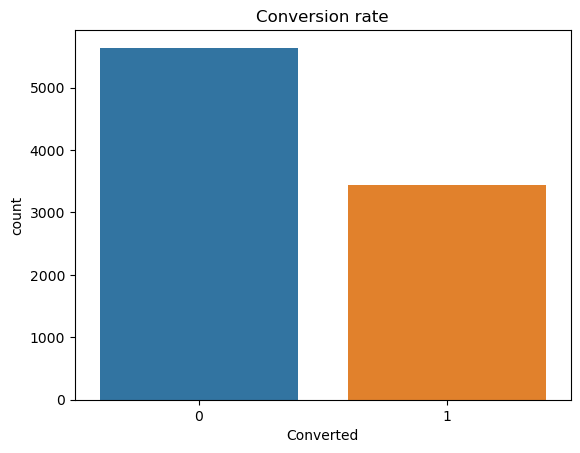

In [1377]:
# Data Imbalance Check
sns.countplot(x='Converted',data=df_leads)
plt.title('Conversion rate')
plt.show()

In [1379]:
(df_leads['Converted'].sum()/len(df_leads['Lead Origin']))*100

37.85541106458012

In [ ]:
# Only 37.8% conversion rate

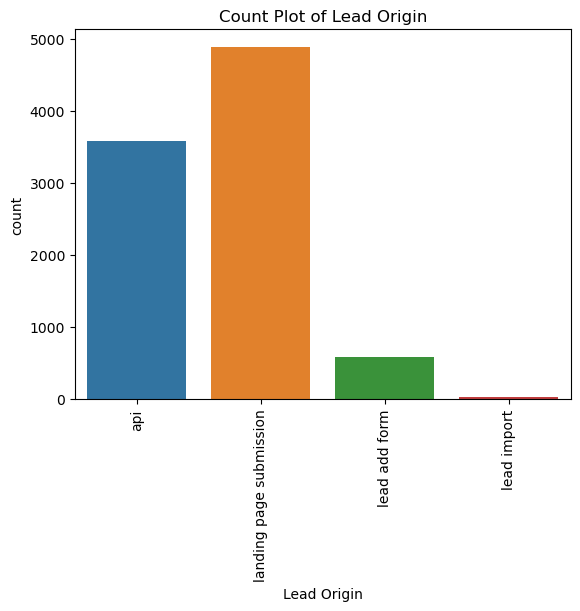

In [1126]:
#count plot of categorical variable Lead Origin
sns.countplot(x='Lead Origin', data=df_leads).tick_params(axis='x', rotation=90)  
plt.title('Count Plot of Lead Origin')
plt.show()


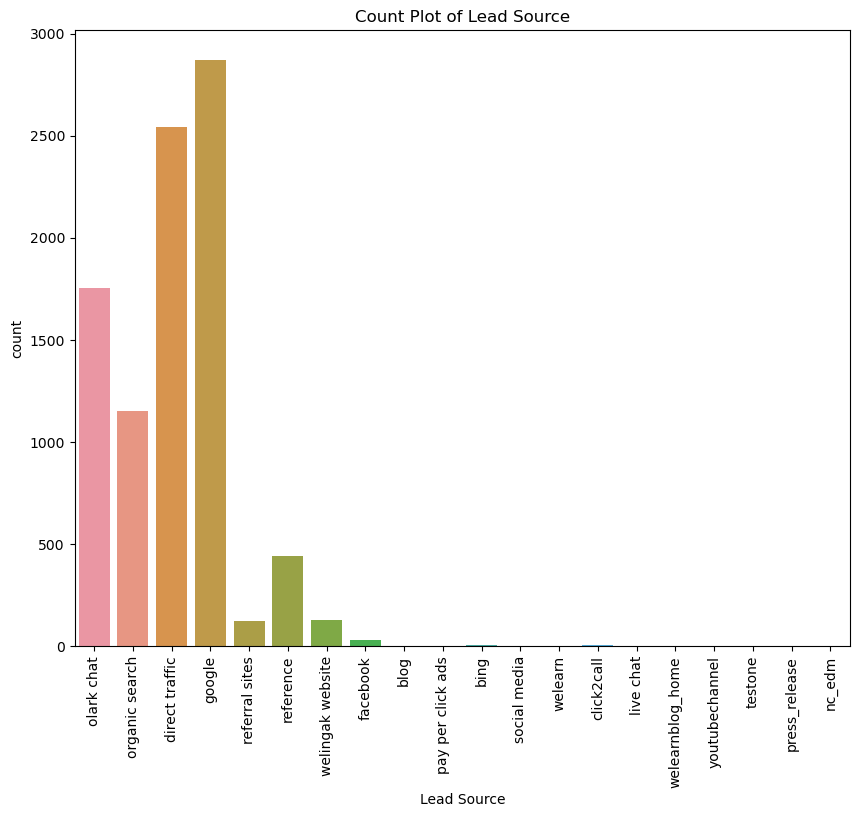

In [1127]:
#count plot of categorical variable Lead Source
plt.figure(figsize=(10,8))
sns.countplot(x='Lead Source', data=df_leads).tick_params(axis='x', rotation=90)  
plt.title('Count Plot of Lead Source')
plt.show()

In [1128]:
df_leads['Lead Source'].value_counts()

google               2873
direct traffic       2543
olark chat           1753
organic search       1154
reference             443
welingak website      129
referral sites        125
facebook               31
bing                    6
click2call              4
social media            2
live chat               2
press_release           2
pay per click ads       1
blog                    1
welearn                 1
welearnblog_home        1
youtubechannel          1
testone                 1
nc_edm                  1
Name: Lead Source, dtype: int64

In [1129]:
# Mostly the source of the lead is google followed by direct traffic and olark chat

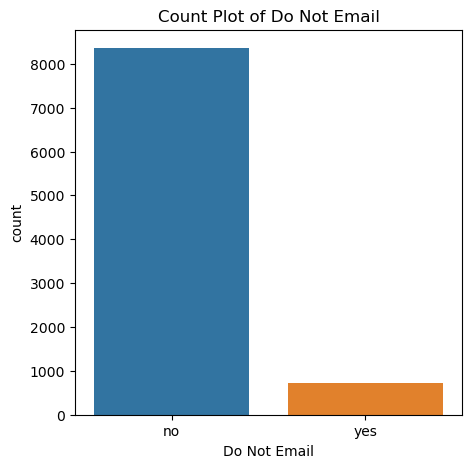

In [1130]:
#count plot of categorical variable Do Not Email
plt.figure(figsize=(5,5))
sns.countplot(x='Do Not Email', data=df_leads)  
plt.title('Count Plot of Do Not Email')
plt.show()

In [1131]:
df_leads['Do Not Email'].value_counts()

no     8358
yes     716
Name: Do Not Email, dtype: int64

In [1132]:
# Most people does not want the company should email them for the course

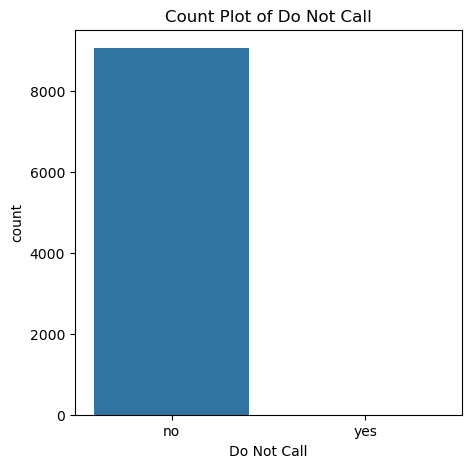

In [1133]:
#count plot of categorical variable Do Not Call 
plt.figure(figsize=(5,5))
sns.countplot(x='Do Not Call', data=df_leads)  
plt.title('Count Plot of Do Not Call')
plt.show()

In [1134]:
df_leads['Do Not Call'].value_counts()

no     9072
yes       2
Name: Do Not Call, dtype: int64

In [1135]:
# Most people does not want the company should call them for the course
# This column will not help in our analysis as all the values are no

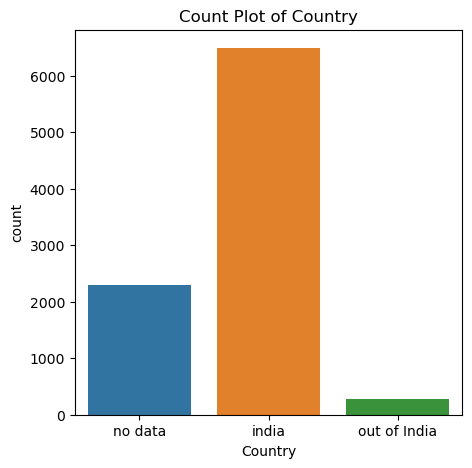

In [1136]:
#count plot of categorical variable Country 
plt.figure(figsize=(5,5))
sns.countplot(x='Country', data=df_leads)  
plt.title('Count Plot of Country')
plt.show()

In [1137]:
df_leads['Country'].value_counts()

india           6491
no data         2296
out of India     287
Name: Country, dtype: int64

In [1138]:
# Mostly indians are looking for the courses

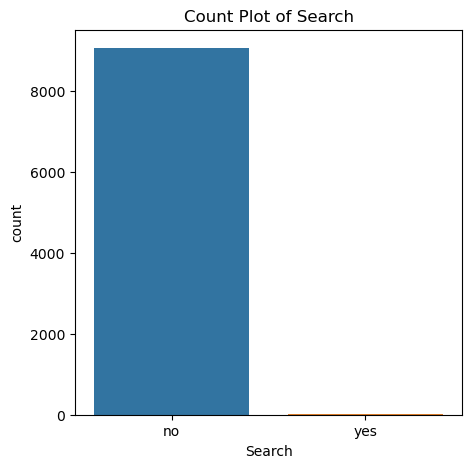

In [1139]:
#count plot of categorical variable Search 
plt.figure(figsize=(5,5))
sns.countplot(x='Search', data=df_leads)  
plt.title('Count Plot of Search')
plt.show()

In [1140]:
df_leads['Search'].value_counts()

no     9060
yes      14
Name: Search, dtype: int64

In [1141]:
# Seems like very less customers has searched for the company
#This column will not help in our analysis as almost all values are no here

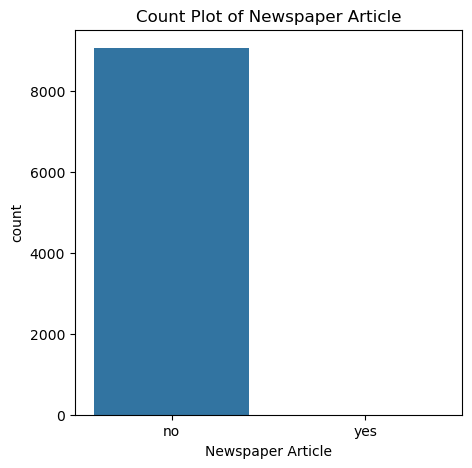

In [1142]:
#count plot of categorical variable Newspaper Article 
plt.figure(figsize=(5,5))
sns.countplot(x='Newspaper Article', data=df_leads)  
plt.title('Count Plot of Newspaper Article')
plt.show()

In [1143]:
df_leads['Newspaper Article'].value_counts()

no     9072
yes       2
Name: Newspaper Article, dtype: int64

In [1144]:
# Almost all the customer has not seen any Newspaper Articles about the company
#This column will not help in our analysis as almost all values are no here

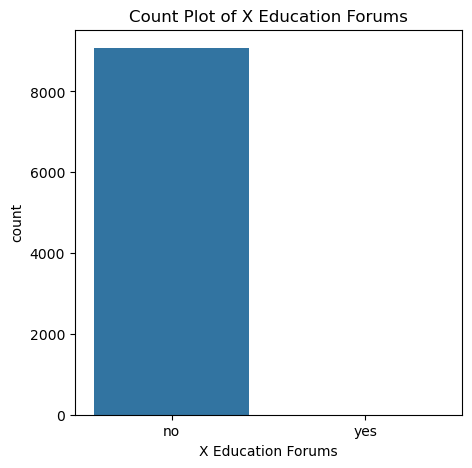

In [1145]:
#count plot of categorical variable X Education Forums 
plt.figure(figsize=(5,5))
sns.countplot(x='X Education Forums', data=df_leads)  
plt.title('Count Plot of X Education Forums')
plt.show()

In [1146]:
df_leads['X Education Forums'].value_counts()

no     9073
yes       1
Name: X Education Forums, dtype: int64

In [1147]:
# Almost all the customer has not seen any X Education Forums
#This column will not help in our analysis as almost all values are no here

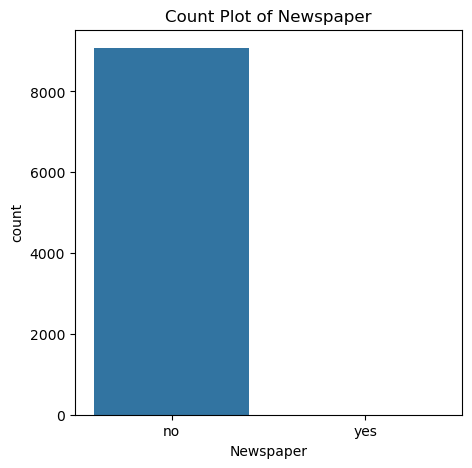

In [1148]:
#count plot of categorical variable Newspaper 
plt.figure(figsize=(5,5))
sns.countplot(x='Newspaper', data=df_leads)  
plt.title('Count Plot of Newspaper')
plt.show()

In [1149]:
df_leads['Newspaper'].value_counts()

no     9073
yes       1
Name: Newspaper, dtype: int64

In [1150]:
# Almost all the customer has not seen any digital advertisements
#This column will not help in our analysis as almost all values are no here

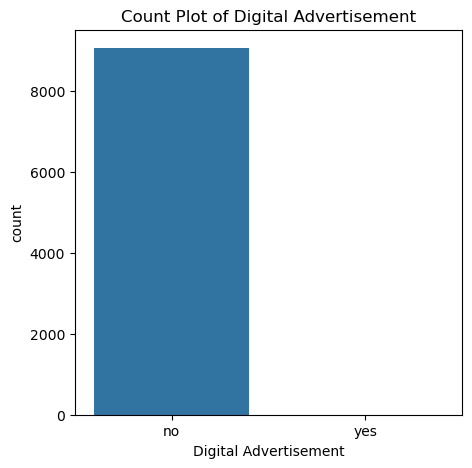

In [1151]:
#count plot of categorical variable Newspaper 
plt.figure(figsize=(5,5))
sns.countplot(x='Digital Advertisement', data=df_leads)  
plt.title('Count Plot of Digital Advertisement')
plt.show()

In [1152]:
df_leads['Digital Advertisement'].value_counts()

no     9070
yes       4
Name: Digital Advertisement, dtype: int64

In [1153]:
# Seems like most of the customer has not seen any digital advertisements
#This column will not help in our analysis as almost all values are no here

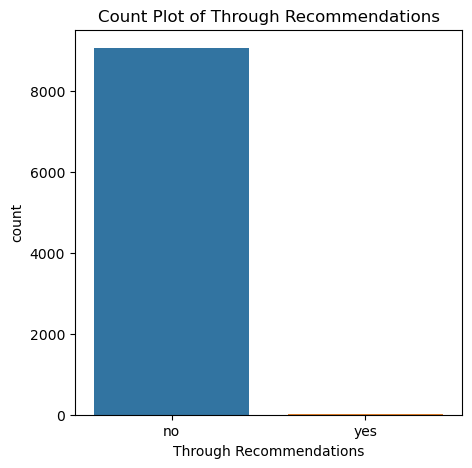

In [1154]:
#count plot of categorical variable Through Recommendations 
plt.figure(figsize=(5,5))
sns.countplot(x='Through Recommendations', data=df_leads)  
plt.title('Count Plot of Through Recommendations')
plt.show()

In [1155]:
df_leads['Through Recommendations'].value_counts()

no     9067
yes       7
Name: Through Recommendations, dtype: int64

In [1156]:
# Seems like very negligible customers are comming through recommendations
#This column will not help in our analysis as almost all values are no here

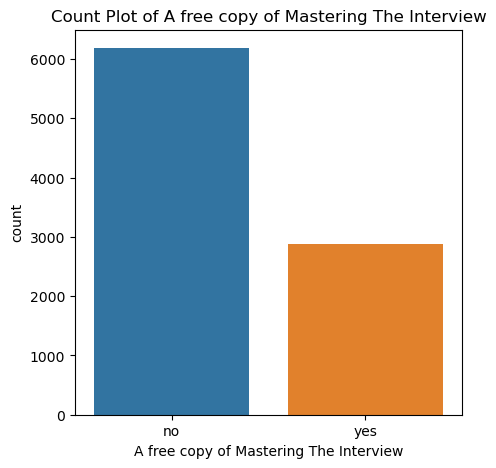

In [1157]:
#count plot of categorical variable A free copy of Mastering The Interview 
plt.figure(figsize=(5,5))
sns.countplot(x='A free copy of Mastering The Interview', data=df_leads)  
plt.title('Count Plot of A free copy of Mastering The Interview')
plt.show()

In [1158]:
df_leads['A free copy of Mastering The Interview'].value_counts()

no     6186
yes    2888
Name: A free copy of Mastering The Interview, dtype: int64

In [1159]:
# This shows maximum people does not want A free copy of Mastering The Interview

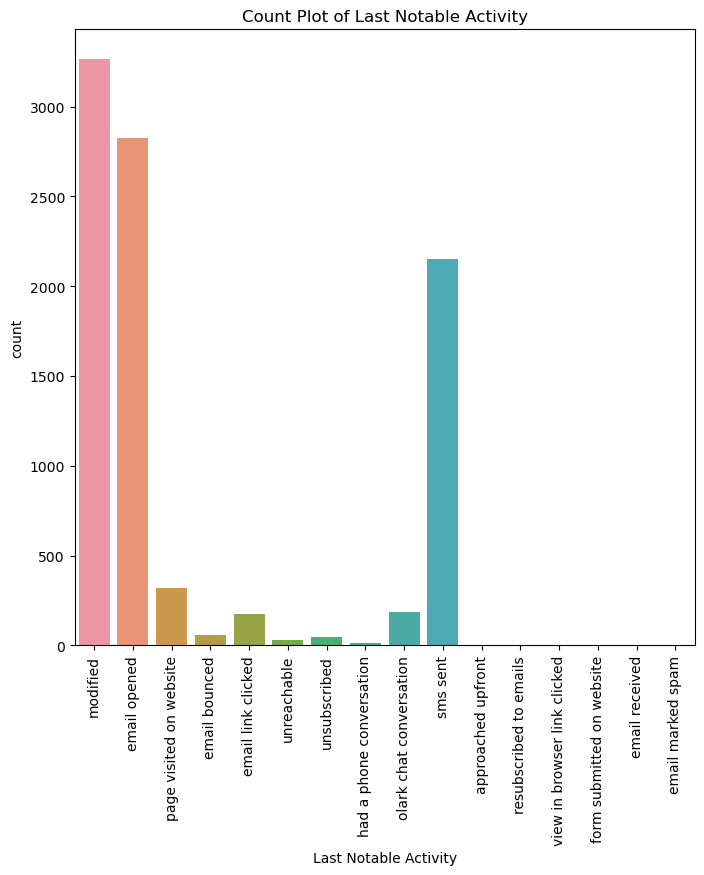

In [1160]:
#count plot of categorical variable Last Notable Activity
plt.figure(figsize=(8,8))
sns.countplot(x='Last Notable Activity', data=df_leads).tick_params(axis='x',rotation=90)
plt.title('Count Plot of Last Notable Activity')
plt.show()

In [1161]:
df_leads['Last Notable Activity'].value_counts()

modified                        3267
email opened                    2823
sms sent                        2152
page visited on website          318
olark chat conversation          183
email link clicked               173
email bounced                     60
unsubscribed                      45
unreachable                       32
had a phone conversation          14
email marked spam                  2
approached upfront                 1
resubscribed to emails             1
view in browser link clicked       1
form submitted on website          1
email received                     1
Name: Last Notable Activity, dtype: int64

In [1162]:
#Most of the activity is modified then followed by email opened and sms sent

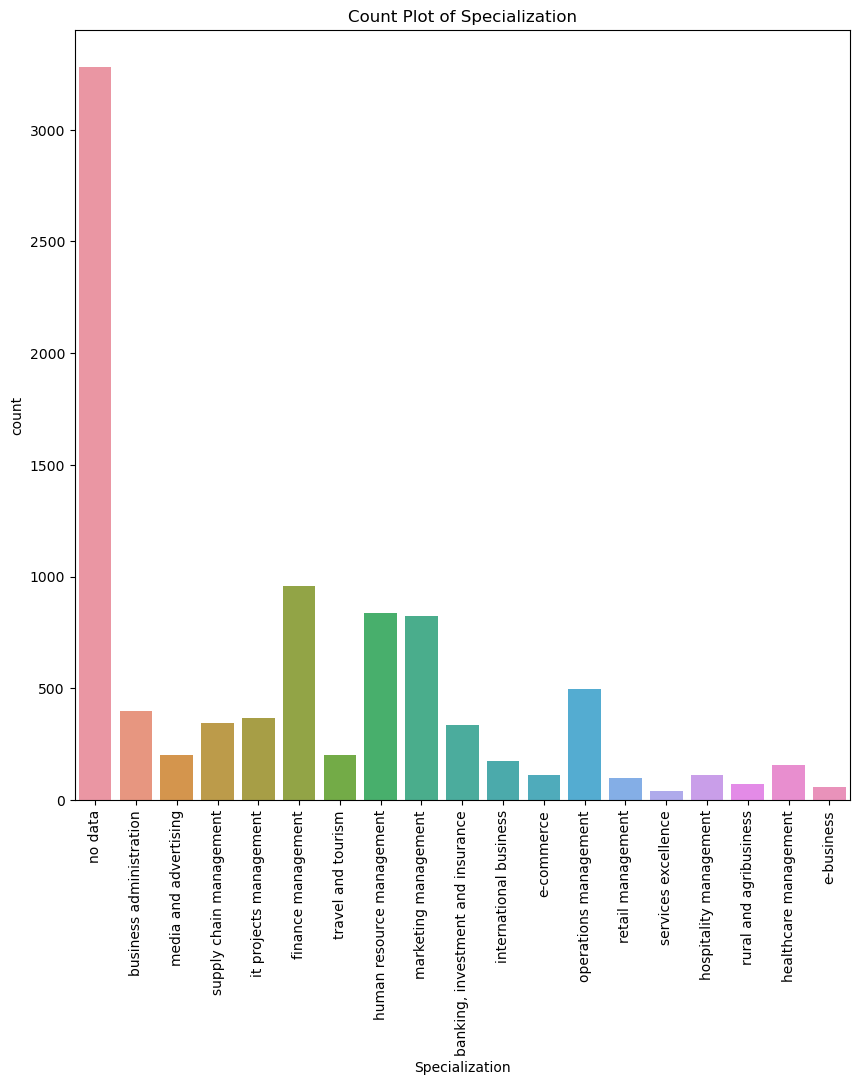

In [1163]:
#count plot of categorical variable Specialization
plt.figure(figsize=(10,10))
sns.countplot(x='Specialization', data=df_leads).tick_params(axis='x',rotation=90)
plt.title('Count Plot of Specialization')
plt.show()

In [1164]:
df_leads['Specialization'].value_counts()

no data                              3282
finance management                    959
human resource management             837
marketing management                  823
operations management                 499
business administration               399
it projects management                366
supply chain management               346
banking, investment and insurance     335
travel and tourism                    202
media and advertising                 202
international business                176
healthcare management                 156
e-commerce                            111
hospitality management                111
retail management                     100
rural and agribusiness                 73
e-business                             57
services excellence                    40
Name: Specialization, dtype: int64

In [1165]:
# It seems most of the people do not have a specialization in mind. Second most opted specialization is Finance management followed by human resource management and marketi8ng management

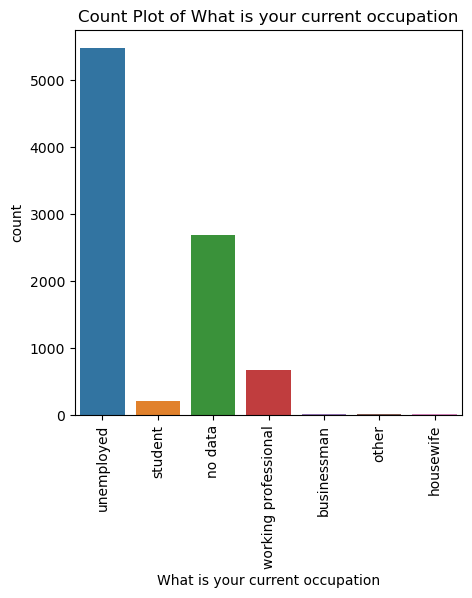

In [1166]:
#count plot of categorical variable What is your current occupation
plt.figure(figsize=(5,5))
sns.countplot(x='What is your current occupation', data=df_leads).tick_params(axis='x',rotation=90)
plt.title('Count Plot of What is your current occupation')
plt.show()

In [1167]:
df_leads['What is your current occupation'].value_counts()

unemployed              5476
no data                 2683
working professional     677
student                  206
other                     15
housewife                  9
businessman                8
Name: What is your current occupation, dtype: int64

In [1168]:
#Mostly unemplyeed people are looking for courses. This might be because they want to change there domain or upskill.

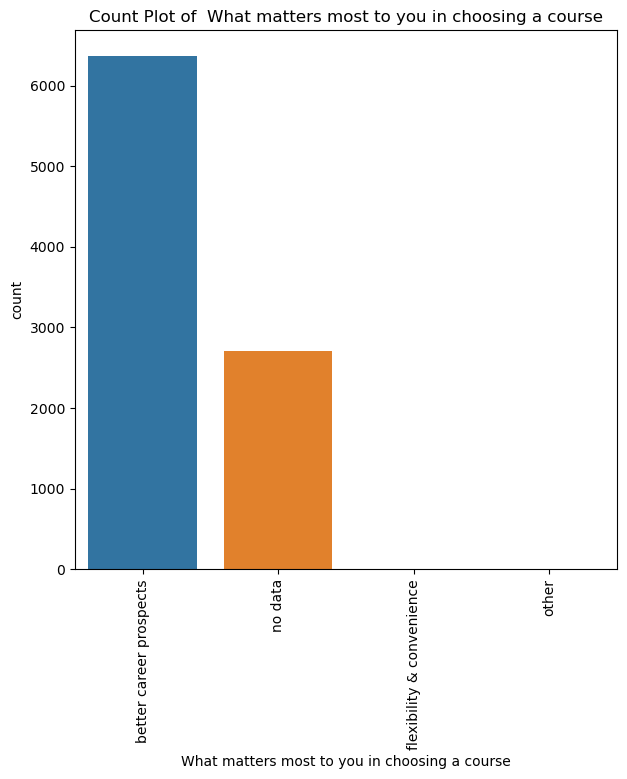

In [1169]:
#count plot of categorical variable What matters most to you in choosing a course
plt.figure(figsize=(7,7))
sns.countplot(x='What matters most to you in choosing a course', data=df_leads).tick_params(axis='x',rotation=90)
plt.title('Count Plot of  What matters most to you in choosing a course')
plt.show()

In [1170]:
df_leads['What matters most to you in choosing a course'].value_counts()

better career prospects      6370
no data                      2702
flexibility & convenience       1
other                           1
Name: What matters most to you in choosing a course, dtype: int64

In [1171]:
# Most of the people are chossing for a course because of better career prospects.
#This column will not help in our analysis as almost all values are better career prospects

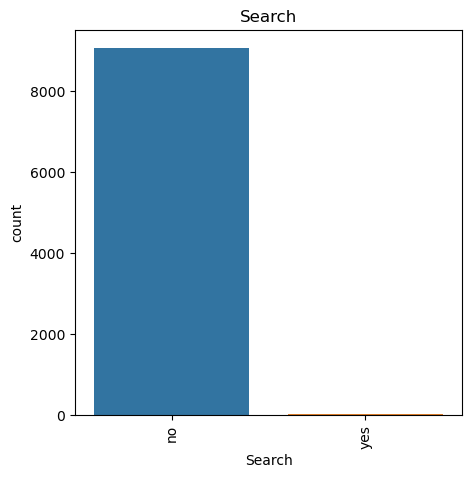

In [1172]:
#count plot of categorical variable Search
plt.figure(figsize=(5,5))
sns.countplot(x='Search', data=df_leads).tick_params(axis='x',rotation=90)
plt.title('Search')
plt.show()

In [1173]:
df_leads['Search'].value_counts()

no     9060
yes      14
Name: Search, dtype: int64

In [1174]:
# almost entire population said no for Search variable ie they did not see any advertisements
#This column will not help in our analysis as almost all values are no here

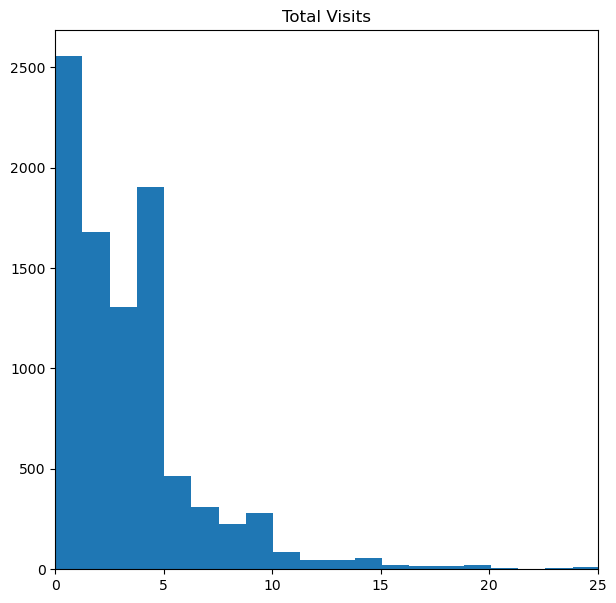

In [1175]:
# Making histogram for numerical variable TotalVisits
plt.figure(figsize=(7,7))
plt.hist(df_leads['TotalVisits'],bins=200)
plt.xlim(0,25)
plt.title('Total Visits')
plt.show()

In [1176]:
# Seems like most pf the people gave 0 to 1 visits on the website

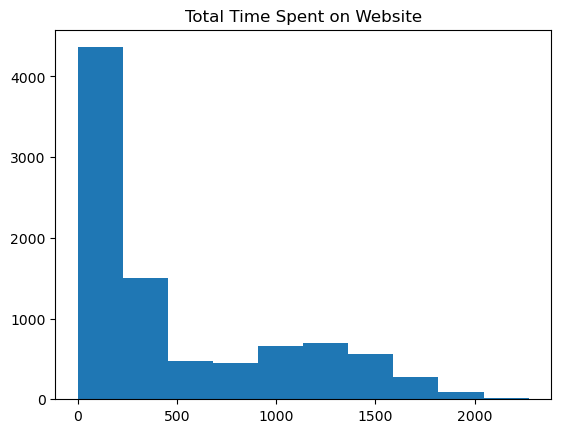

In [1177]:
plt.hist(df_leads['Total Time Spent on Website'],bins=10)
plt.title('Total Time Spent on Website')
plt.show()

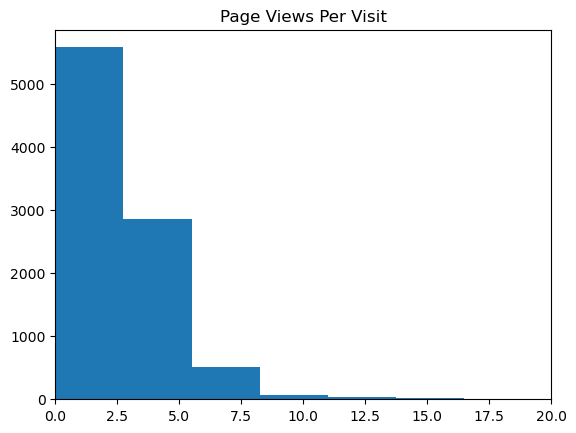

In [1178]:
plt.hist(df_leads['Page Views Per Visit'],bins=20)
plt.title('Page Views Per Visit')
plt.xlim(0,20)
plt.show()

In [1179]:
# most of the customers saw 2 pages while they were on the website

## Bivariate Analysis

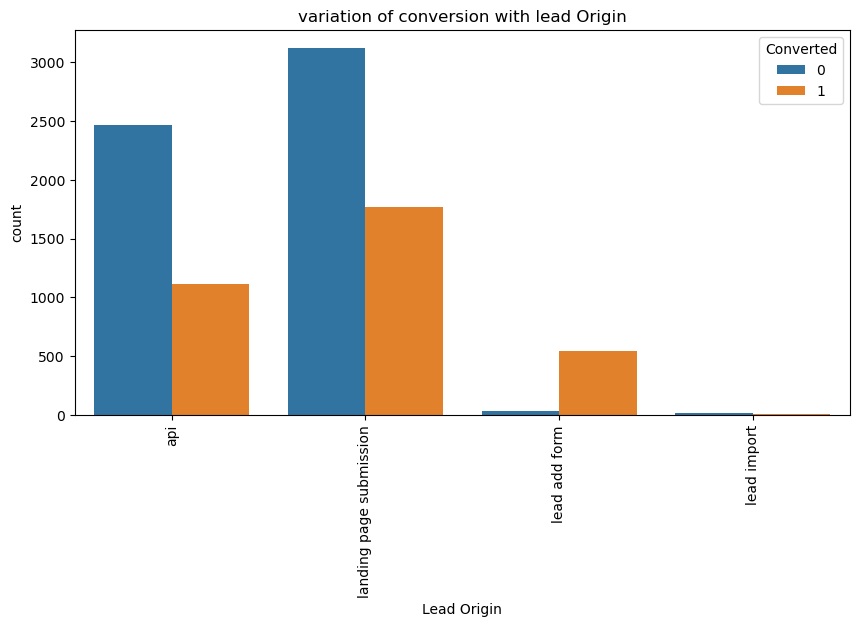

In [1180]:
#Bivariate analysis of Lead Origin with converted
plt.figure(figsize=(10,5))
sns.countplot(x='Lead Origin', hue='Converted', data=df_leads).tick_params(axis='x',rotation=90)
plt.title('variation of conversion with lead Origin')
plt.show()

In [1181]:
# Seems like most of the conversion rate took in the category where category was landing page submission

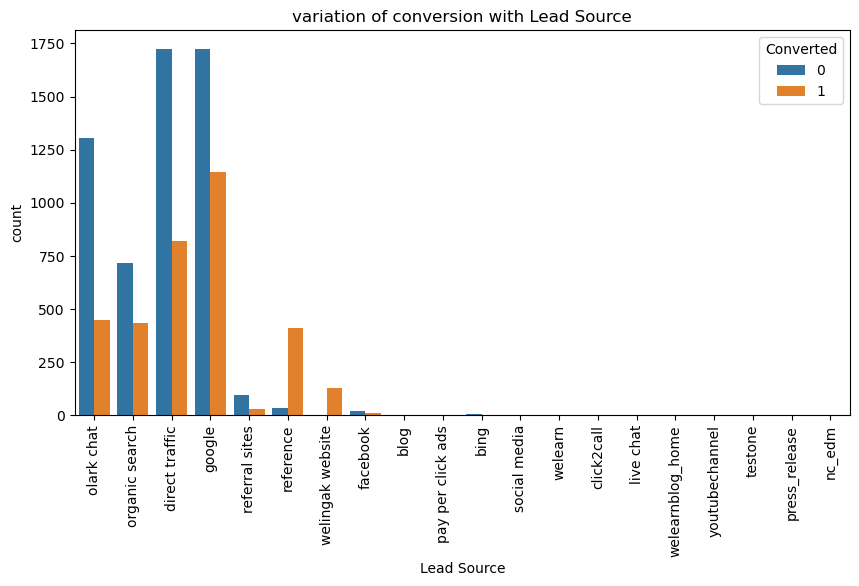

In [1182]:
#Bivariate analysis of Lead Source with converted
plt.figure(figsize=(10,5))
sns.countplot(x='Lead Source', hue='Converted', data=df_leads).tick_params(axis='x',rotation=90)
plt.title('variation of conversion with Lead Source')
plt.show()

In [1183]:
# Most of the conversion took place where the source was google followed by direct traffic

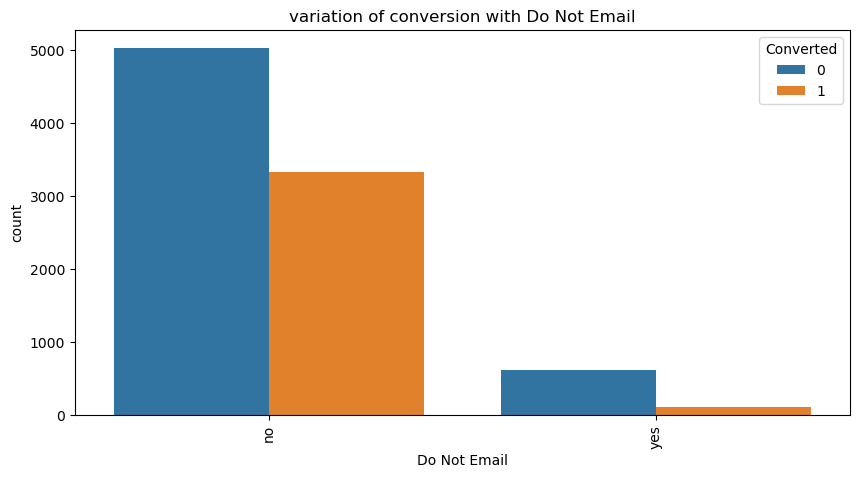

In [1184]:
#Bivariate analysis of Do Not Email with converted
plt.figure(figsize=(10,5))
sns.countplot(x='Do Not Email', hue='Converted', data=df_leads).tick_params(axis='x',rotation=90)
plt.title('variation of conversion with Do Not Email')
plt.show()

In [1185]:
df_leads[(df_leads['Converted']==1) & (df_leads['Do Not Email']=='no')]['Do Not Email'].count()

3331

In [1186]:
# 3331 customers were successfull conversion who said no to Do Not Email column

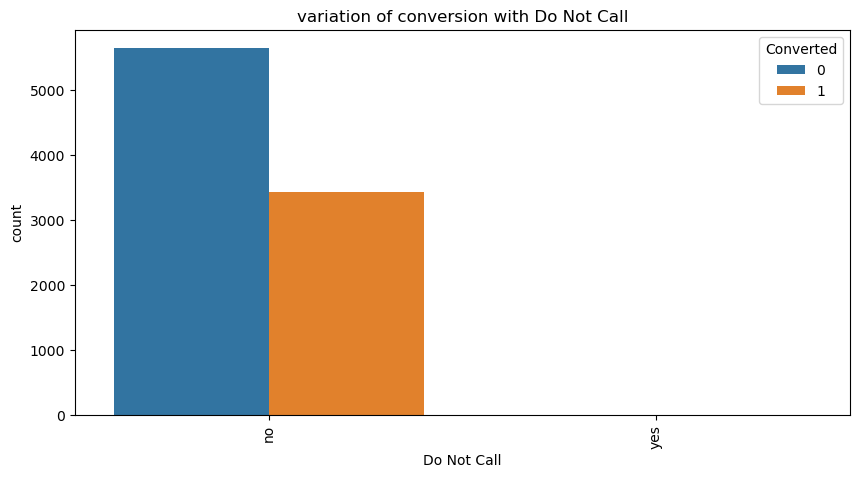

In [1187]:
#Bivariate analysis of Do Not Call with converted
plt.figure(figsize=(10,5))
sns.countplot(x='Do Not Call', hue='Converted', data=df_leads).tick_params(axis='x',rotation=90)
plt.title('variation of conversion with Do Not Call')
plt.show()

In [1188]:
df_leads[(df_leads['Converted']==1) & (df_leads['Do Not Call']=='no')]['Do Not Email'].count()

3433

In [1189]:
# 3433 customers were successful conversion who said no iN Do NoT Call Column

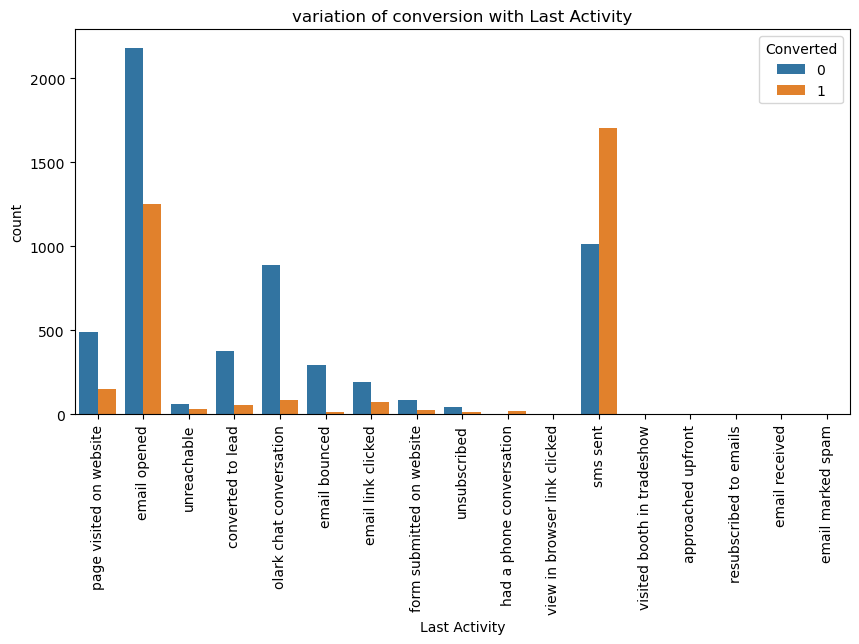

In [1190]:
#Bivariate analysis of Last Activity with converted
plt.figure(figsize=(10,5))
sns.countplot(x='Last Activity', hue='Converted', data=df_leads).tick_params(axis='x',rotation=90)
plt.title('variation of conversion with Last Activity')
plt.show()

In [1191]:
df_leads[(df_leads['Last Activity']=='sms sent') & df_leads['Converted']==1]['Last Activity'].count()

1705

In [1192]:
# 1705 people whose last Activity was sms sent were successfully converted followed by 1250 people whose last Activity was email opened were successfully converted. 

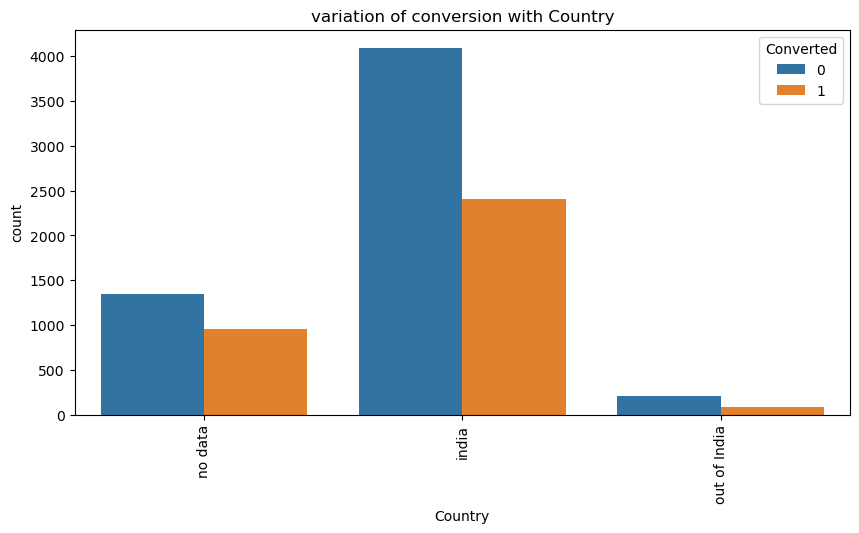

In [1193]:
#Bivariate analysis of Country with converted
plt.figure(figsize=(10,5))
sns.countplot(x='Country', hue='Converted', data=df_leads).tick_params(axis='x',rotation=90)
plt.title('variation of conversion with Country')
plt.show()

In [1194]:
# Most of the converted leads are from India

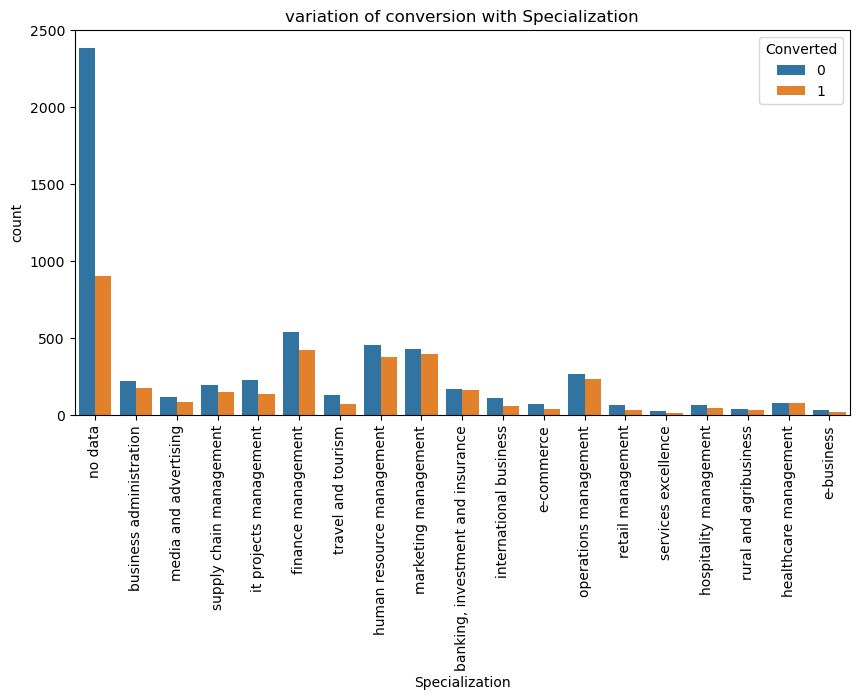

In [1195]:
#Bivariate analysis of Specialization with converted
plt.figure(figsize=(10,5))
sns.countplot(x='Specialization', hue='Converted', data=df_leads).tick_params(axis='x',rotation=90)
plt.title('variation of conversion with Specialization')
plt.show()

In [1196]:
df_leads[(df_leads['Specialization']=='marketing management') & df_leads['Converted']==1]['Specialization'].count()

397

In [1197]:
df_leads[(df_leads['Specialization']=='finance management') & df_leads['Converted']==1]['Specialization'].count()

422

In [1198]:
# Around 422 people with specialization from Finance Management were successfully converted followed by marketing management with 397 conversions

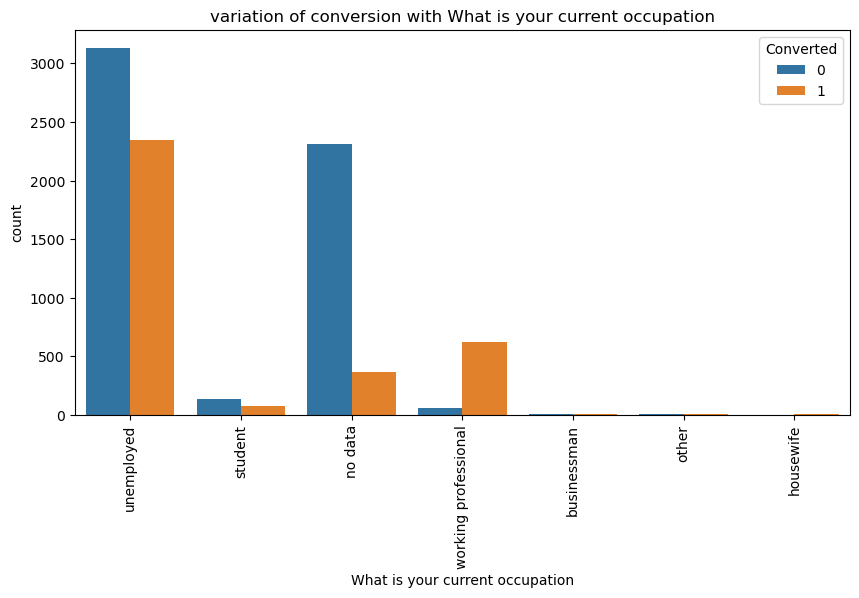

In [1199]:
#Bivariate analysis of What is your current occupation with converted
plt.figure(figsize=(10,5))
sns.countplot(x='What is your current occupation', hue='Converted', data=df_leads).tick_params(axis='x',rotation=90)
plt.title('variation of conversion with What is your current occupation')
plt.show()

In [1200]:
df_leads[(df_leads['What is your current occupation']=='unemployed') & df_leads['Converted']==1]['What is your current occupation'].count()

2346

In [1201]:
# 2346 people who are not employed were successfully converted for the course

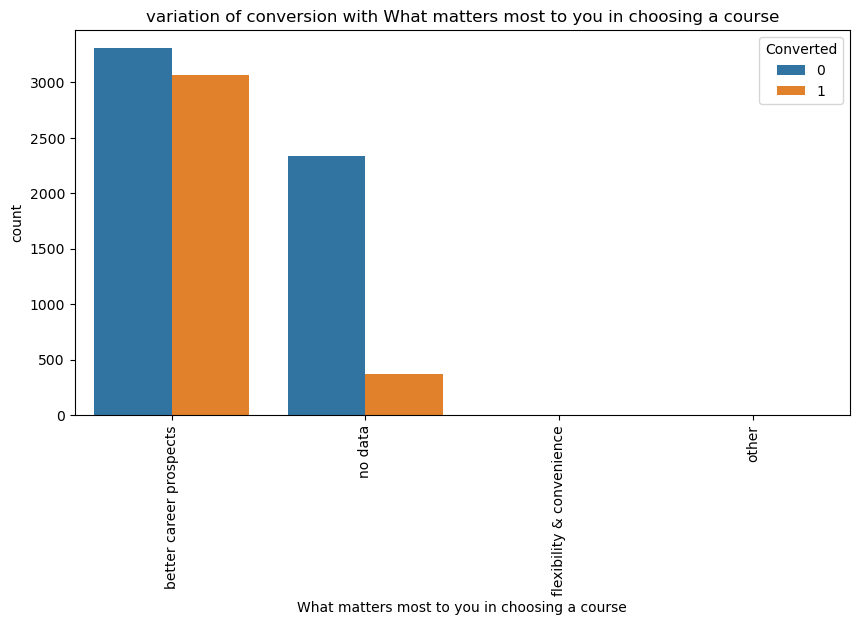

In [1202]:
#Bivariate analysis of What matters most to you in choosing a course
plt.figure(figsize=(10,5))
sns.countplot(x='What matters most to you in choosing a course', hue='Converted', data=df_leads).tick_params(axis='x',rotation=90)
plt.title('variation of conversion with What matters most to you in choosing a course')
plt.show()

In [1203]:
# most of the people who are opting for a course are looking for better career prospects

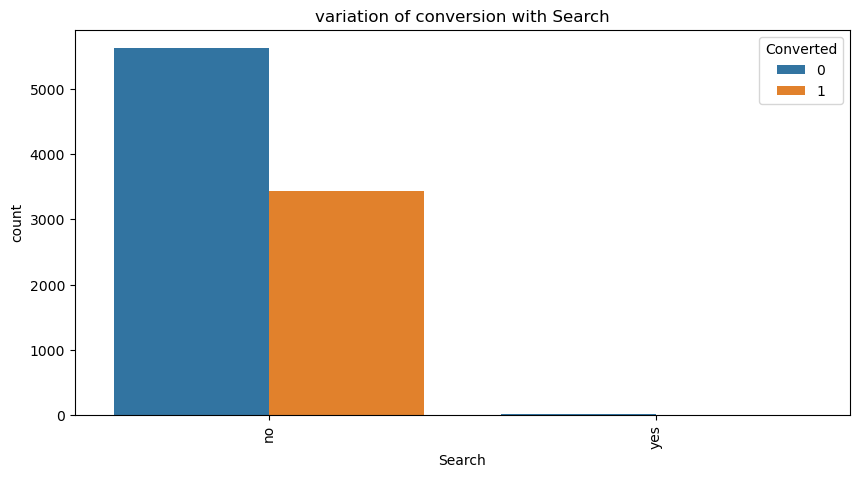

In [1204]:
#Bivariate analysis of Search
plt.figure(figsize=(10,5))
sns.countplot(x='Search', hue='Converted', data=df_leads).tick_params(axis='x',rotation=90)
plt.title('variation of conversion with Search')
plt.show()

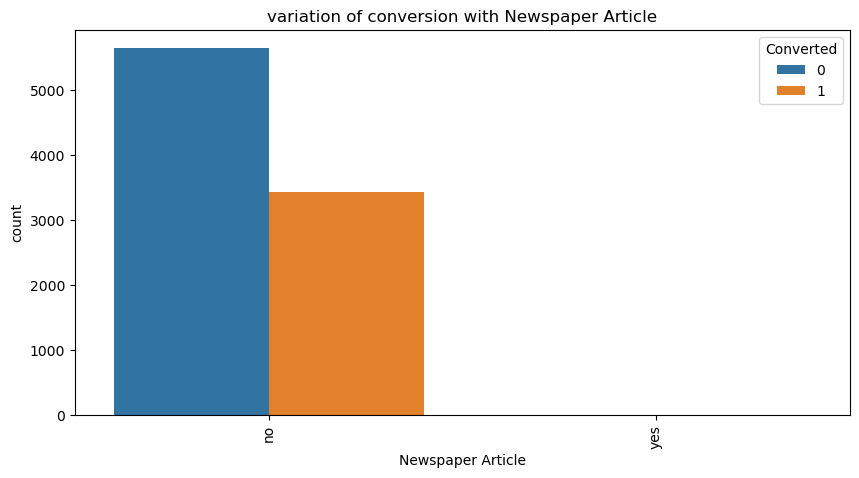

In [1205]:
#Bivariate analysis of Newspaper Article
plt.figure(figsize=(10,5))
sns.countplot(x='Newspaper Article', hue='Converted', data=df_leads).tick_params(axis='x',rotation=90)
plt.title('variation of conversion with Newspaper Article')
plt.show()

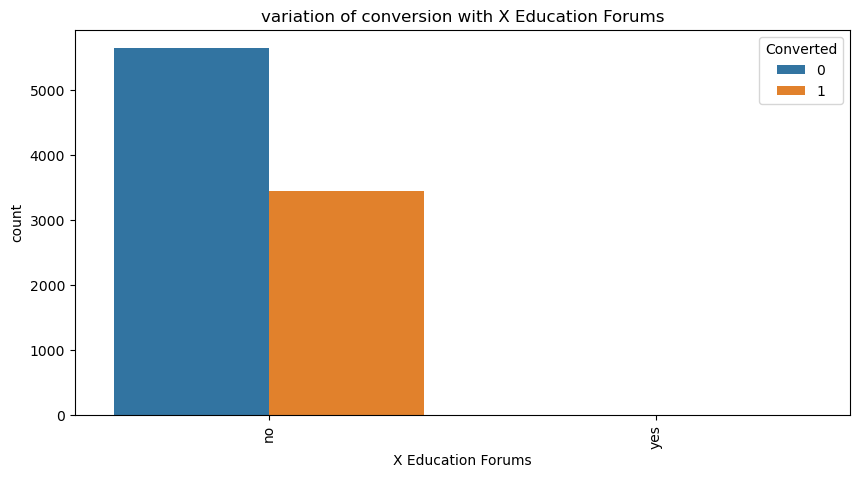

In [1206]:
#Bivariate analysis of X Education Forums
plt.figure(figsize=(10,5))
sns.countplot(x='X Education Forums', hue='Converted', data=df_leads).tick_params(axis='x',rotation=90)
plt.title('variation of conversion with X Education Forums')
plt.show()

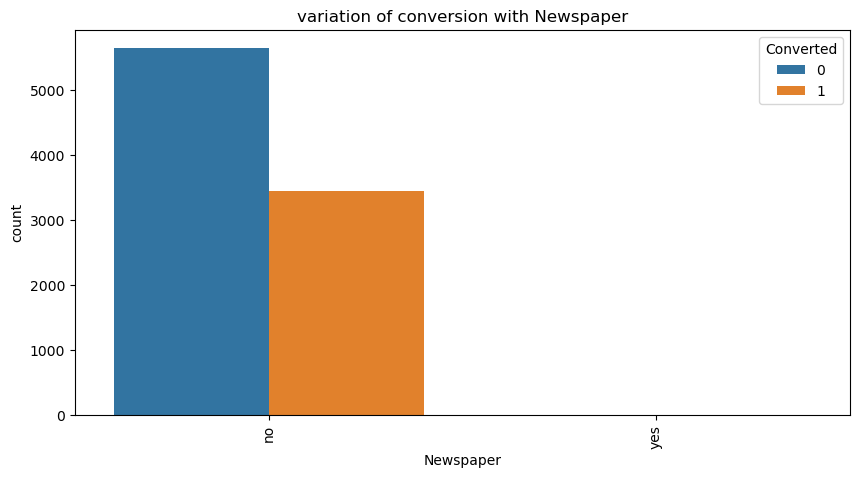

In [1207]:
#Bivariate analysis of Newspaper
plt.figure(figsize=(10,5))
sns.countplot(x='Newspaper', hue='Converted', data=df_leads).tick_params(axis='x',rotation=90)
plt.title('variation of conversion with Newspaper')
plt.show()

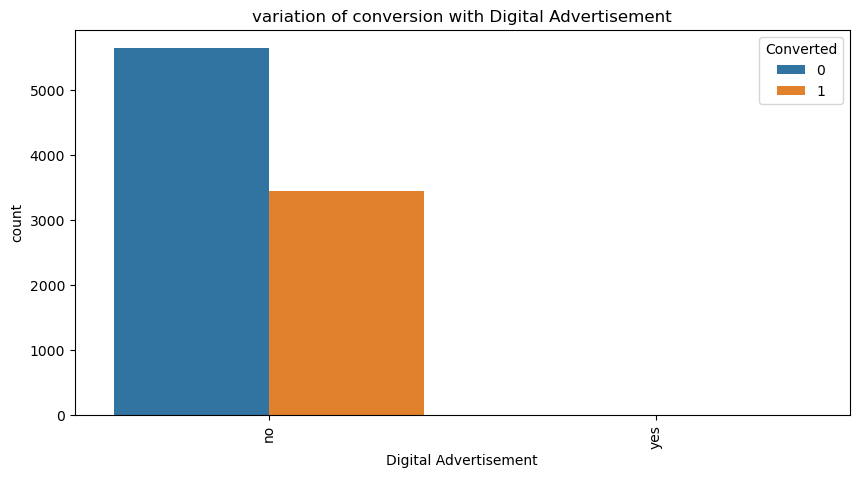

In [1208]:
#Bivariate analysis of Digital Advertisement
plt.figure(figsize=(10,5))
sns.countplot(x='Digital Advertisement', hue='Converted', data=df_leads).tick_params(axis='x',rotation=90)
plt.title('variation of conversion with Digital Advertisement')
plt.show()

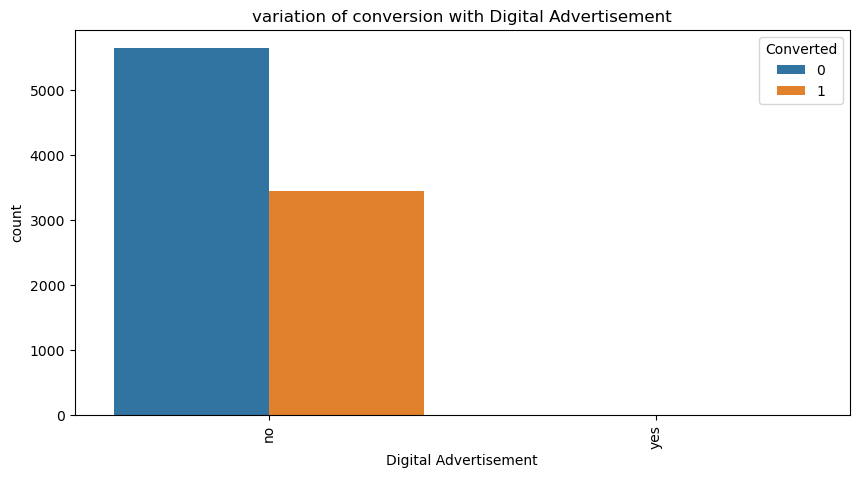

In [1209]:
#Bivariate analysis of Digital Advertisement
plt.figure(figsize=(10,5))
sns.countplot(x='Digital Advertisement', hue='Converted', data=df_leads).tick_params(axis='x',rotation=90)
plt.title('variation of conversion with Digital Advertisement')
plt.show()

In [1210]:
# Few of the charts shown abover like Newspaper Artcile, Digital Advertisement etc shows that people are not seeing advertisemnets and that advertisments are not playing a good part in the conversion of people to take the course. This means company should work on there publicity.

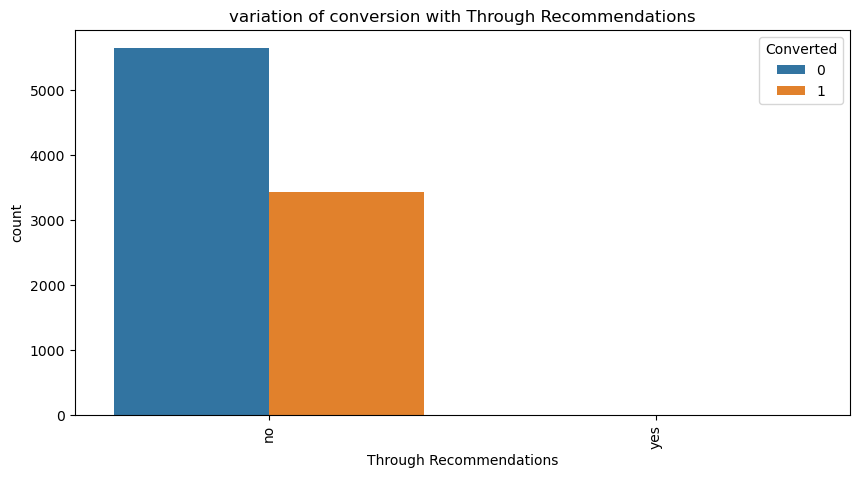

In [1211]:
#Bivariate analysis of Through Recommendations
plt.figure(figsize=(10,5))
sns.countplot(x='Through Recommendations', hue='Converted', data=df_leads).tick_params(axis='x',rotation=90)
plt.title('variation of conversion with Through Recommendations')
plt.show()

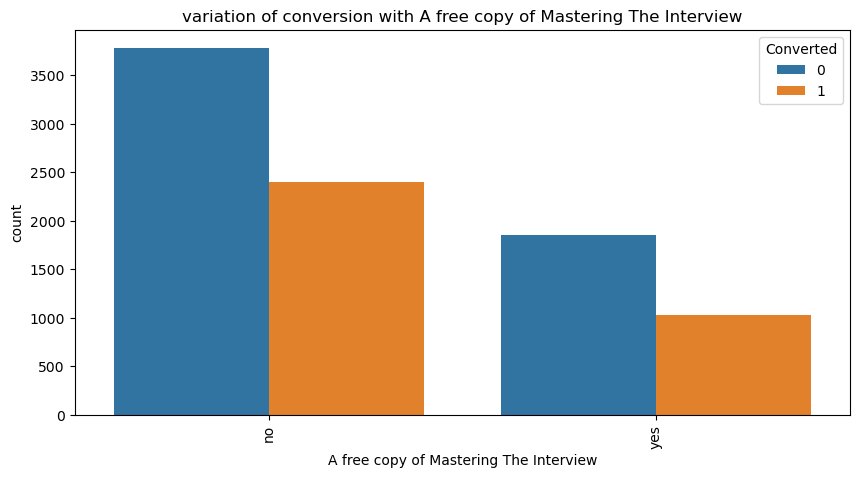

In [1212]:
#Bivariate analysis of A free copy of Mastering The Interview
plt.figure(figsize=(10,5))
sns.countplot(x='A free copy of Mastering The Interview', hue='Converted', data=df_leads).tick_params(axis='x',rotation=90)
plt.title('variation of conversion with A free copy of Mastering The Interview')
plt.show()

In [1213]:
# Seems like not much people are interested in taking the free copy of mastering the interview

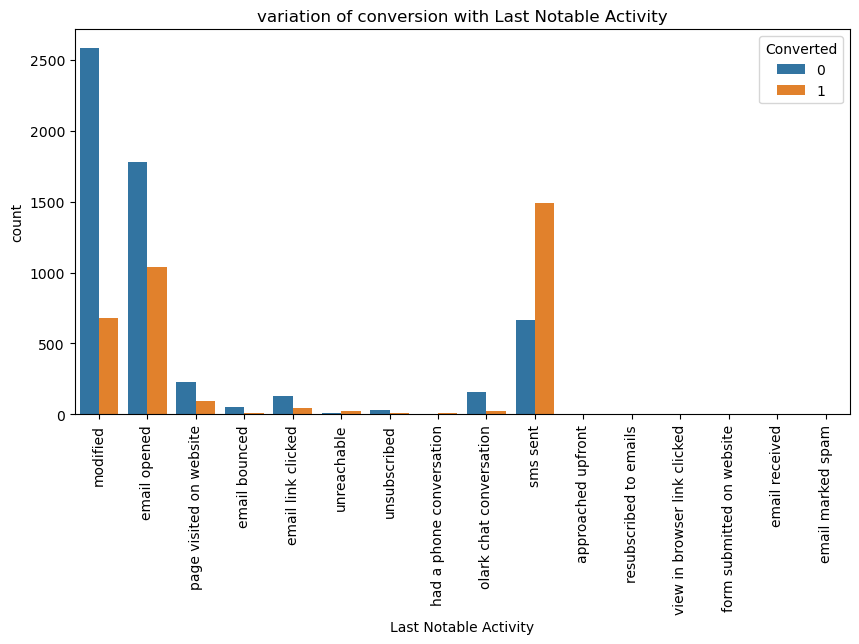

In [1214]:
#Bivariate analysis of Last Notable Activity
plt.figure(figsize=(10,5))
sns.countplot(x='Last Notable Activity', hue='Converted', data=df_leads).tick_params(axis='x',rotation=90)
plt.title('variation of conversion with Last Notable Activity')
plt.show()

In [1215]:
df_leads[(df_leads['Last Notable Activity']=='sms sent') & df_leads['Converted']==1]['Last Notable Activity'].count()

1489

In [1216]:
# maximum successful conversions come from the customers where the Last Notable Activity is sms sent

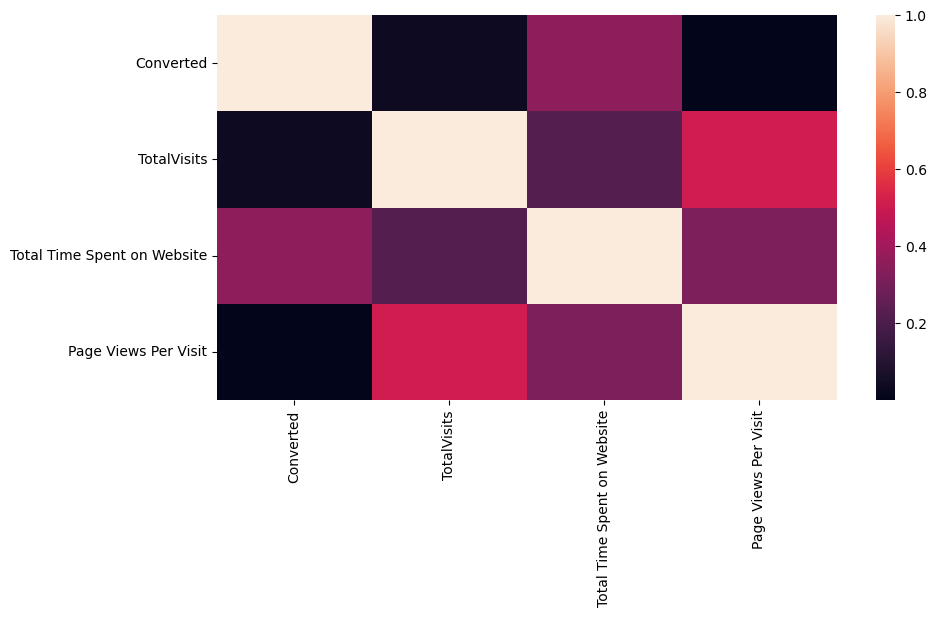

In [1217]:
# Creating heatmap for checking the corellation between all the numerical variables
plt.figure(figsize=(10,5))
sns.heatmap(df_leads.corr())
plt.show()

In [1218]:
# seems there is some correlation between TotalVisits and Page Views per Visit

## Outlier Treatment for Numerical Columns

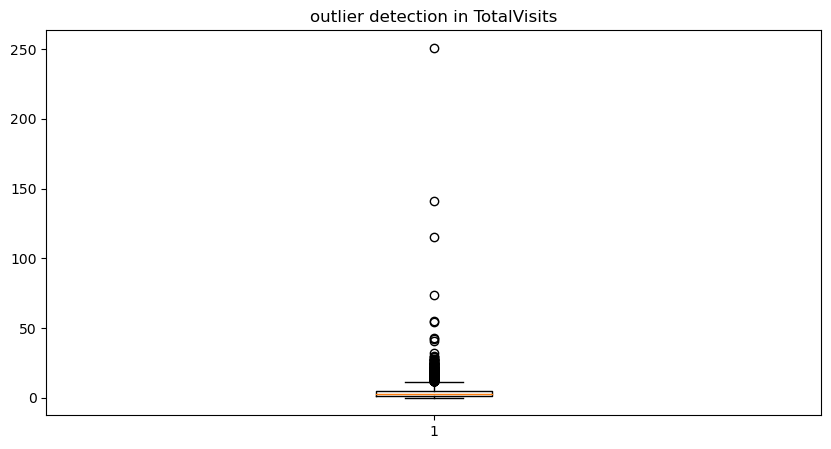

In [1219]:
plt.figure(figsize=(10,5))
plt.boxplot(df_leads['TotalVisits'])
plt.title('outlier detection in TotalVisits')
plt.show()

In [1220]:
#Deleting rows where TotalVisits are greater than as it is very less in number and has a potential to hamper our analysis
df_leads=df_leads[~(df_leads['TotalVisits']>50)]

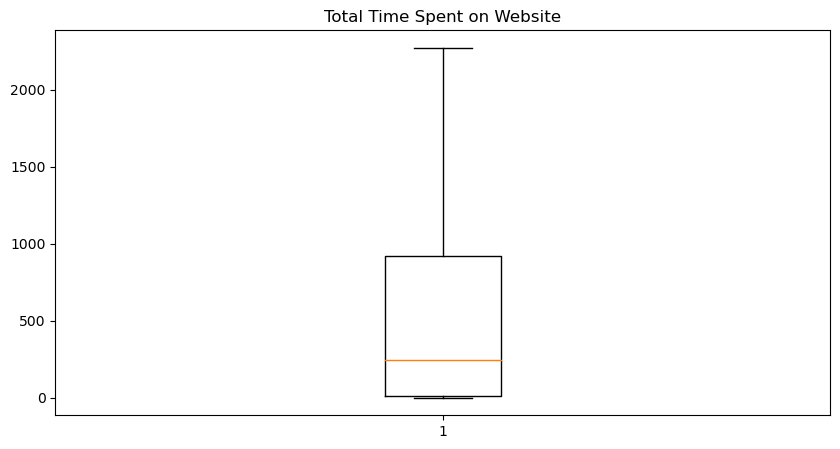

In [1221]:
plt.figure(figsize=(10,5))
plt.boxplot(df_leads['Total Time Spent on Website'])
plt.title('Total Time Spent on Website')
plt.show()

In [1222]:
# Total Time Spent on Website seems to be good

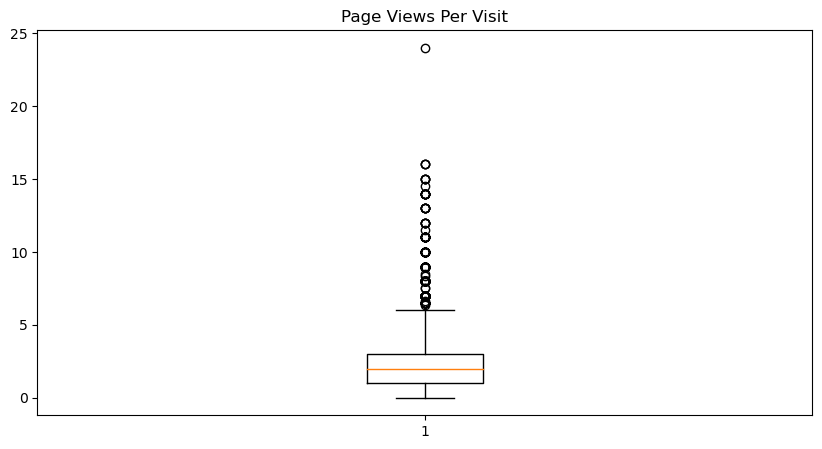

In [1223]:
plt.figure(figsize=(10,5))
plt.boxplot(df_leads['Page Views Per Visit'])
plt.title('Page Views Per Visit')
plt.show()

In [1224]:
#Dropping anything which is greater than 16 for Page Views per Visit
df_leads=df_leads[~(df_leads['Page Views Per Visit']>16)]

In [1225]:
numrical_columns=df_leads[['TotalVisits','Total Time Spent on Website','Page Views Per Visit']]
numrical_columns.describe(percentiles=[0.25,0.5,0.75,0.9,0.99])

,TotalVisits,Total Time Spent on Website,Page Views Per Visit
count,9067.000000,9067.000000,9067.000000
mean,3.379949,482.675306,2.359603
std,3.497408,545.200271,2.073248
min,0.000000,0.000000,0.000000
25%,1.000000,11.000000,1.000000
50%,3.000000,246.000000,2.000000
75%,5.000000,921.500000,3.000000
90%,7.000000,1373.000000,5.000000
99%,17.000000,1839.000000,9.000000
max,43.000000,2272.000000,16.000000


In [1226]:
#Seems now the outliers are handled

## Dummy Variables

In [1227]:
# Fetching all object type columns from data frame and creating dummy values for it
new_lst=[]
for i in df_leads.columns:
    if df_leads[i].dtype=='object':
        new_lst.append(i)


In [1228]:
new_lst

['Lead Origin',
 'Lead Source',
 'Do Not Email',
 'Do Not Call',
 'Last Activity',
 'Country',
 'Specialization',
 'What is your current occupation',
 'What matters most to you in choosing a course',
 'Search',
 'Newspaper Article',
 'X Education Forums',
 'Newspaper',
 'Digital Advertisement',
 'Through Recommendations',
 'A free copy of Mastering The Interview',
 'Last Notable Activity']

In [1229]:
#Creating dummy values for columns which can help us in analysis and has more than one categories where we have significant amount of values
dummy_df=pd.get_dummies(df_leads[['Lead Origin',
 'Lead Source',
 'Do Not Email',
 'Last Activity',
 'Specialization',
 'What is your current occupation',
 'A free copy of Mastering The Interview',
 'Last Notable Activity']], drop_first=True)

In [1230]:
dummy_df

,Lead Origin_landing page submission,Lead Origin_lead add form,Lead Origin_lead import,Lead Source_blog,Lead Source_click2call,Lead Source_direct traffic,Lead Source_facebook,Lead Source_google,Lead Source_live chat,Lead Source_nc_edm,...,Last Notable Activity_form submitted on website,Last Notable Activity_had a phone conversation,Last Notable Activity_modified,Last Notable Activity_olark chat conversation,Last Notable Activity_page visited on website,Last Notable Activity_resubscribed to emails,Last Notable Activity_sms sent,Last Notable Activity_unreachable,Last Notable Activity_unsubscribed,Last Notable Activity_view in browser link clicked
0,0,0,0,0,0,0,0,0,0,0,...,0,0,1,0,0,0,0,0,0,0
1,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,1,0,0,0,0,1,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,1,0,0,0,0,1,0,0,0,0,...,0,0,1,0,0,0,0,0,0,0
4,1,0,0,0,0,0,0,1,0,0,...,0,0,1,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9235,1,0,0,0,0,1,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
9236,1,0,0,0,0,1,0,0,0,0,...,0,0,0,0,0,0,1,0,0,0
9237,1,0,0,0,0,1,0,0,0,0,...,0,0,0,0,0,0,1,0,0,0
9238,1,0,0,0,0,0,0,1,0,0,...,0,0,0,0,0,0,1,0,0,0


In [1231]:
#Merging with master dataframe
df_leads_merge=pd.concat([df_leads,dummy_df],axis=1)

In [1232]:
df_leads_merge

,Lead Origin,Lead Source,Do Not Email,Do Not Call,Converted,TotalVisits,Total Time Spent on Website,Page Views Per Visit,Last Activity,Country,...,Last Notable Activity_form submitted on website,Last Notable Activity_had a phone conversation,Last Notable Activity_modified,Last Notable Activity_olark chat conversation,Last Notable Activity_page visited on website,Last Notable Activity_resubscribed to emails,Last Notable Activity_sms sent,Last Notable Activity_unreachable,Last Notable Activity_unsubscribed,Last Notable Activity_view in browser link clicked
0,api,olark chat,no,no,0,0.0,0,0.00,page visited on website,no data,...,0,0,1,0,0,0,0,0,0,0
1,api,organic search,no,no,0,5.0,674,2.50,email opened,india,...,0,0,0,0,0,0,0,0,0,0
2,landing page submission,direct traffic,no,no,1,2.0,1532,2.00,email opened,india,...,0,0,0,0,0,0,0,0,0,0
3,landing page submission,direct traffic,no,no,0,1.0,305,1.00,unreachable,india,...,0,0,1,0,0,0,0,0,0,0
4,landing page submission,google,no,no,1,2.0,1428,1.00,converted to lead,india,...,0,0,1,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9235,landing page submission,direct traffic,yes,no,1,8.0,1845,2.67,email marked spam,out of India,...,0,0,0,0,0,0,0,0,0,0
9236,landing page submission,direct traffic,no,no,0,2.0,238,2.00,sms sent,india,...,0,0,0,0,0,0,1,0,0,0
9237,landing page submission,direct traffic,yes,no,0,2.0,199,2.00,sms sent,india,...,0,0,0,0,0,0,1,0,0,0
9238,landing page submission,google,no,no,1,3.0,499,3.00,sms sent,india,...,0,0,0,0,0,0,1,0,0,0


In [1233]:
#Dropping columns which cannot help us in anlyisis as mentioned in univariate and Bivariate analysis and also those who have beenin converted to dummy values
df_leads_merge=df_leads_merge.drop(['What is your current occupation_no data','Lead Origin', 'Lead Source', 'Do Not Email', 'Do Not Call','Last Activity', 'Country', 'Specialization', 'Specialization_no data','What is your current occupation','What matters most to you in choosing a course', 'Search','Newspaper Article', 'X Education Forums', 'Newspaper','Digital Advertisement', 'Through Recommendations','A free copy of Mastering The Interview', 'Last Notable Activity'],axis=1)

In [1234]:
df_leads_merge

,Converted,TotalVisits,Total Time Spent on Website,Page Views Per Visit,Lead Origin_landing page submission,Lead Origin_lead add form,Lead Origin_lead import,Lead Source_blog,Lead Source_click2call,Lead Source_direct traffic,...,Last Notable Activity_form submitted on website,Last Notable Activity_had a phone conversation,Last Notable Activity_modified,Last Notable Activity_olark chat conversation,Last Notable Activity_page visited on website,Last Notable Activity_resubscribed to emails,Last Notable Activity_sms sent,Last Notable Activity_unreachable,Last Notable Activity_unsubscribed,Last Notable Activity_view in browser link clicked
0,0,0.0,0,0.00,0,0,0,0,0,0,...,0,0,1,0,0,0,0,0,0,0
1,0,5.0,674,2.50,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,1,2.0,1532,2.00,1,0,0,0,0,1,...,0,0,0,0,0,0,0,0,0,0
3,0,1.0,305,1.00,1,0,0,0,0,1,...,0,0,1,0,0,0,0,0,0,0
4,1,2.0,1428,1.00,1,0,0,0,0,0,...,0,0,1,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9235,1,8.0,1845,2.67,1,0,0,0,0,1,...,0,0,0,0,0,0,0,0,0,0
9236,0,2.0,238,2.00,1,0,0,0,0,1,...,0,0,0,0,0,0,1,0,0,0
9237,0,2.0,199,2.00,1,0,0,0,0,1,...,0,0,0,0,0,0,1,0,0,0
9238,1,3.0,499,3.00,1,0,0,0,0,0,...,0,0,0,0,0,0,1,0,0,0


In [1235]:
df_leads.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 9067 entries, 0 to 9239
Data columns (total 21 columns):
 #   Column                                         Non-Null Count  Dtype  
---  ------                                         --------------  -----  
 0   Lead Origin                                    9067 non-null   object 
 1   Lead Source                                    9067 non-null   object 
 2   Do Not Email                                   9067 non-null   object 
 3   Do Not Call                                    9067 non-null   object 
 4   Converted                                      9067 non-null   int64  
 5   TotalVisits                                    9067 non-null   float64
 6   Total Time Spent on Website                    9067 non-null   int64  
 7   Page Views Per Visit                           9067 non-null   float64
 8   Last Activity                                  9067 non-null   object 
 9   Country                                        9067 

## Splitting the data into train and test data set

In [1236]:
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import MinMaxScaler

In [1237]:
x=df_leads_merge.drop(['Converted'],axis=1)

In [1238]:
x.head()

,TotalVisits,Total Time Spent on Website,Page Views Per Visit,Lead Origin_landing page submission,Lead Origin_lead add form,Lead Origin_lead import,Lead Source_blog,Lead Source_click2call,Lead Source_direct traffic,Lead Source_facebook,...,Last Notable Activity_form submitted on website,Last Notable Activity_had a phone conversation,Last Notable Activity_modified,Last Notable Activity_olark chat conversation,Last Notable Activity_page visited on website,Last Notable Activity_resubscribed to emails,Last Notable Activity_sms sent,Last Notable Activity_unreachable,Last Notable Activity_unsubscribed,Last Notable Activity_view in browser link clicked
0,0.0,0,0.0,0,0,0,0,0,0,0,...,0,0,1,0,0,0,0,0,0,0
1,5.0,674,2.5,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,2.0,1532,2.0,1,0,0,0,0,1,0,...,0,0,0,0,0,0,0,0,0,0
3,1.0,305,1.0,1,0,0,0,0,1,0,...,0,0,1,0,0,0,0,0,0,0
4,2.0,1428,1.0,1,0,0,0,0,0,0,...,0,0,1,0,0,0,0,0,0,0


In [1239]:
y=df_leads_merge['Converted']

In [1240]:
x_train,x_test,y_train,y_test=train_test_split(x,y,train_size=0.7,test_size=0.3,random_state=10)

In [1241]:
#Initializing scaling technique
scaler=MinMaxScaler()

In [1242]:
#Scaling train data set
x_train[['TotalVisits','Page Views Per Visit','Total Time Spent on Website']]=scaler.fit_transform(x_train[['TotalVisits','Page Views Per Visit','Total Time Spent on Website']])

In [1243]:
x_train

,TotalVisits,Total Time Spent on Website,Page Views Per Visit,Lead Origin_landing page submission,Lead Origin_lead add form,Lead Origin_lead import,Lead Source_blog,Lead Source_click2call,Lead Source_direct traffic,Lead Source_facebook,...,Last Notable Activity_form submitted on website,Last Notable Activity_had a phone conversation,Last Notable Activity_modified,Last Notable Activity_olark chat conversation,Last Notable Activity_page visited on website,Last Notable Activity_resubscribed to emails,Last Notable Activity_sms sent,Last Notable Activity_unreachable,Last Notable Activity_unsubscribed,Last Notable Activity_view in browser link clicked
5491,0.119048,0.124560,0.15625,1,0,0,0,0,1,0,...,0,0,1,0,0,0,0,0,0,0
5018,0.095238,0.018926,0.25000,1,0,0,0,0,0,0,...,0,0,0,0,0,0,1,0,0,0
4925,0.095238,0.363996,0.25000,1,0,0,0,0,0,0,...,0,0,1,0,0,0,0,0,0,0
7976,0.023810,0.213468,0.06250,1,0,0,0,0,1,0,...,0,0,1,0,0,0,0,0,0,0
4209,0.000000,0.000000,0.00000,0,0,0,0,0,0,0,...,0,0,1,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4938,0.047619,0.013644,0.12500,1,0,0,0,0,0,0,...,0,0,0,0,0,0,1,0,0,0
7441,0.047619,0.006602,0.06250,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1399,0.071429,0.255282,0.09375,1,0,0,0,0,1,0,...,0,0,0,0,0,0,0,0,0,0
7443,0.000000,0.000000,0.00000,0,0,0,0,0,0,0,...,0,0,0,1,0,0,0,0,0,0


## Model Building

In [1244]:
from sklearn.linear_model import LogisticRegression
from sklearn.feature_selection import RFE
import statsmodels.api as sm
from statsmodels.stats.outliers_influence import variance_inflation_factor



In [1245]:
#We will find 15 most relevant features from the huge dataframe inorder to make our model. This we will do using Recurrsive Feature Selection(RFE)
logreg=LogisticRegression()
rfe = RFE(logreg, n_features_to_select=15)
rfe=rfe.fit(x_train,y_train)

In [1246]:
# Features the rfe selected
list(zip(x_train.columns,rfe.support_,rfe.ranking_))

[('TotalVisits', True, 1),
 ('Total Time Spent on Website', True, 1),
 ('Page Views Per Visit', True, 1),
 ('Lead Origin_landing page submission', False, 26),
 ('Lead Origin_lead add form', True, 1),
 ('Lead Origin_lead import', False, 43),
 ('Lead Source_blog', False, 45),
 ('Lead Source_click2call', False, 65),
 ('Lead Source_direct traffic', False, 6),
 ('Lead Source_facebook', False, 44),
 ('Lead Source_google', False, 8),
 ('Lead Source_live chat', False, 55),
 ('Lead Source_nc_edm', False, 19),
 ('Lead Source_olark chat', False, 20),
 ('Lead Source_organic search', False, 7),
 ('Lead Source_pay per click ads', False, 66),
 ('Lead Source_press_release', False, 54),
 ('Lead Source_reference', False, 41),
 ('Lead Source_referral sites', False, 10),
 ('Lead Source_social media', False, 40),
 ('Lead Source_testone', False, 46),
 ('Lead Source_welearn', False, 48),
 ('Lead Source_welearnblog_home', False, 52),
 ('Lead Source_welingak website', True, 1),
 ('Lead Source_youtubechannel', 

In [1247]:
# Getting all the columns selected by rfe
col=x_train.columns[rfe.support_]

In [1248]:
col

Index(['TotalVisits', 'Total Time Spent on Website', 'Page Views Per Visit',
       'Lead Origin_lead add form', 'Lead Source_welingak website',
       'Do Not Email_yes', 'What is your current occupation_housewife',
       'What is your current occupation_other',
       'What is your current occupation_working professional',
       'Last Notable Activity_email link clicked',
       'Last Notable Activity_email opened',
       'Last Notable Activity_had a phone conversation',
       'Last Notable Activity_modified',
       'Last Notable Activity_olark chat conversation',
       'Last Notable Activity_page visited on website'],
      dtype='object')

In [1249]:
#selecting only the columns selected by rfe
x_train=x_train[col]

In [1250]:
#Adding constant to the train dataset
x_train_sm=sm.add_constant(x_train)

In [1251]:
#Fitting a logistic model
logm1=sm.GLM(y_train,x_train_sm,family=sm.families.Binomial())

In [1252]:
res=logm1.fit()

In [1253]:
res.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                 Generalized Linear Model Regression Results                  
==============================================================================
Dep. Variable:              Converted   No. Observations:                 6346
Model:                            GLM   Df Residuals:                     6330
Model Family:                Binomial   Df Model:                           15
Link Function:                  Logit   Scale:                          1.0000
Method:                          IRLS   Log-Likelihood:                -2688.9
Date:                Sun, 14 Jan 2024   Deviance:                       5377.7
Time:                        15:14:15   Pearson chi2:                 6.64e+03
No. Iterations:                    22   Pseudo R-squ. (CS):             0.3826
Covariance Type:            nonrobust                                         
========================================================================================================================
                                                           coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------------------------------------------------
const                                                   -0.2219      0.085     -2.621      0.009      -0.388      -0.056
TotalVisits                                              2.8839      0.532      5.424      0.000       1.842       3.926
Total Time Spent on Website                              4.1780      0.153     27.336      0.000       3.878       4.478
Page Views Per Visit                                    -2.9016      0.372     -7.800      0.000      -3.631      -2.172
Lead Origin_lead add form                                3.5719      0.233     15.299      0.000       3.114       4.029
Lead Source_welingak website                             2.6285      1.043      2.519      0.012       0.584       4.674
Do Not Email_yes                                        -1.7227      0.172    -10.031      0.000      -2.059      -1.386
What is your current occupation_housewife               23.3880   2.91e+04      0.001      0.999    -5.7e+04    5.71e+04
What is your current occupation_other                    2.2995      1.227      1.873      0.061      -0.106       4.705
What is your current occupation_working professional     2.7474      0.188     14.583      0.000       2.378       3.117
Last Notable Activity_email link clicked                -1.9829      0.269     -7.380      0.000      -2.509      -1.456
Last Notable Activity_email opened                      -1.4068      0.087    -16.089      0.000      -1.578      -1.235
Last Notable Activity_had a phone conversation          22.7107   2.13e+04      0.001      0.999   -4.18e+04    4.18e+04
Last Notable Activity_modified                          -2.1436      0.093    -23.137      0.000      -2.325      -1.962
Last Notable Activity_olark chat conversation           -2.6571      0.322     -8.246      0.000      -3.289      -2.026
Last Notable Activity_page visited on website           -2.1256      0.216     -9.824      0.000      -2.550      -1.702
========================================================================================================================
"""

In [1254]:
# Making a VIF dataframe for all the variables present
vif=pd.DataFrame()
vif['Features']=x_train.columns
vif['VIF']=[variance_inflation_factor(x_train.values,i) for i in range(x_train.shape[1])]
vif['VIF']=round(vif['VIF'],2)
vif=vif.sort_values(by="VIF",ascending=False)
vif

,Features,VIF
2,Page Views Per Visit,4.01
0,TotalVisits,3.73
1,Total Time Spent on Website,1.94
10,Last Notable Activity_email opened,1.46
3,Lead Origin_lead add form,1.44
12,Last Notable Activity_modified,1.35
4,Lead Source_welingak website,1.31
14,Last Notable Activity_page visited on website,1.17
8,What is your current occupation_working profes...,1.16
5,Do Not Email_yes,1.11


In [1255]:
# Dropping Last Notable Activity_had a phone conversation as the p value is high
x_train.drop('Last Notable Activity_had a phone conversation',axis=1,inplace=True)

In [1256]:
# Refitting a logistic model
x_train_sm=sm.add_constant(x_train)

In [1257]:
logm2=sm.GLM(y_train,x_train_sm,family=sm.families.Binomial())
res=logm2.fit()

In [1258]:
res.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                 Generalized Linear Model Regression Results                  
==============================================================================
Dep. Variable:              Converted   No. Observations:                 6346
Model:                            GLM   Df Residuals:                     6331
Model Family:                Binomial   Df Model:                           14
Link Function:                  Logit   Scale:                          1.0000
Method:                          IRLS   Log-Likelihood:                -2692.6
Date:                Sun, 14 Jan 2024   Deviance:                       5385.3
Time:                        15:14:16   Pearson chi2:                 6.66e+03
No. Iterations:                    21   Pseudo R-squ. (CS):             0.3818
Covariance Type:            nonrobust                                         
========================================================================================================================
                                                           coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------------------------------------------------
const                                                   -0.2141      0.085     -2.531      0.011      -0.380      -0.048
TotalVisits                                              2.9104      0.530      5.495      0.000       1.872       3.949
Total Time Spent on Website                              4.1718      0.153     27.329      0.000       3.873       4.471
Page Views Per Visit                                    -2.8843      0.371     -7.772      0.000      -3.612      -2.157
Lead Origin_lead add form                                3.5735      0.234     15.304      0.000       3.116       4.031
Lead Source_welingak website                             2.6299      1.044      2.520      0.012       0.585       4.675
Do Not Email_yes                                        -1.7303      0.172    -10.073      0.000      -2.067      -1.394
What is your current occupation_housewife               22.3884   1.77e+04      0.001      0.999   -3.46e+04    3.46e+04
What is your current occupation_other                    2.2953      1.227      1.871      0.061      -0.109       4.700
What is your current occupation_working professional     2.7460      0.188     14.576      0.000       2.377       3.115
Last Notable Activity_email link clicked                -1.9940      0.269     -7.423      0.000      -2.520      -1.468
Last Notable Activity_email opened                      -1.4184      0.087    -16.243      0.000      -1.590      -1.247
Last Notable Activity_modified                          -2.1537      0.093    -23.267      0.000      -2.335      -1.972
Last Notable Activity_olark chat conversation           -2.6666      0.322     -8.275      0.000      -3.298      -2.035
Last Notable Activity_page visited on website           -2.1394      0.216     -9.895      0.000      -2.563      -1.716
========================================================================================================================
"""

In [1259]:
# Making a VIF dataframe for all the variables present
vif=pd.DataFrame()
vif['Features']=x_train.columns
vif['VIF']=[variance_inflation_factor(x_train.values,i) for i in range(x_train.shape[1])]
vif['VIF']=round(vif['VIF'],2)
vif=vif.sort_values(by="VIF",ascending=False)
vif

,Features,VIF
2,Page Views Per Visit,4.01
0,TotalVisits,3.73
1,Total Time Spent on Website,1.94
10,Last Notable Activity_email opened,1.45
3,Lead Origin_lead add form,1.44
11,Last Notable Activity_modified,1.35
4,Lead Source_welingak website,1.31
13,Last Notable Activity_page visited on website,1.17
8,What is your current occupation_working profes...,1.16
5,Do Not Email_yes,1.11


In [1260]:
# Dropping column What is your current occupation_housewife as it has insignificant p value
x_train=x_train.drop('What is your current occupation_housewife',axis=1)

In [1261]:
# Refitting a logistic model
x_train_sm=sm.add_constant(x_train)

In [1262]:
logm3=sm.GLM(y_train,x_train_sm,family=sm.families.Binomial())
res=logm3.fit()

In [1263]:
res.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                 Generalized Linear Model Regression Results                  
==============================================================================
Dep. Variable:              Converted   No. Observations:                 6346
Model:                            GLM   Df Residuals:                     6332
Model Family:                Binomial   Df Model:                           13
Link Function:                  Logit   Scale:                          1.0000
Method:                          IRLS   Log-Likelihood:                -2696.0
Date:                Sun, 14 Jan 2024   Deviance:                       5391.9
Time:                        15:14:18   Pearson chi2:                 6.67e+03
No. Iterations:                     7   Pseudo R-squ. (CS):             0.3812
Covariance Type:            nonrobust                                         
========================================================================================================================
                                                           coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------------------------------------------------
const                                                   -0.2149      0.085     -2.540      0.011      -0.381      -0.049
TotalVisits                                              2.9031      0.530      5.482      0.000       1.865       3.941
Total Time Spent on Website                              4.1763      0.153     27.365      0.000       3.877       4.475
Page Views Per Visit                                    -2.8825      0.371     -7.771      0.000      -3.610      -2.155
Lead Origin_lead add form                                3.5992      0.233     15.439      0.000       3.142       4.056
Lead Source_welingak website                             2.6029      1.043      2.495      0.013       0.558       4.648
Do Not Email_yes                                        -1.7321      0.172    -10.080      0.000      -2.069      -1.395
What is your current occupation_other                    2.2919      1.227      1.868      0.062      -0.113       4.697
What is your current occupation_working professional     2.7432      0.188     14.559      0.000       2.374       3.112
Last Notable Activity_email link clicked                -1.9816      0.267     -7.427      0.000      -2.505      -1.459
Last Notable Activity_email opened                      -1.4158      0.087    -16.216      0.000      -1.587      -1.245
Last Notable Activity_modified                          -2.1503      0.093    -23.241      0.000      -2.332      -1.969
Last Notable Activity_olark chat conversation           -2.6667      0.322     -8.274      0.000      -3.298      -2.035
Last Notable Activity_page visited on website           -2.1387      0.216     -9.891      0.000      -2.563      -1.715
========================================================================================================================
"""

In [1264]:
# Making a VIF dataframe for all the variables present
vif=pd.DataFrame()
vif['Features']=x_train.columns
vif['VIF']=[variance_inflation_factor(x_train.values,i) for i in range(x_train.shape[1])]
vif['VIF']=round(vif['VIF'],2)
vif=vif.sort_values(by="VIF",ascending=False)
vif

,Features,VIF
2,Page Views Per Visit,4.01
0,TotalVisits,3.73
1,Total Time Spent on Website,1.94
9,Last Notable Activity_email opened,1.45
3,Lead Origin_lead add form,1.43
10,Last Notable Activity_modified,1.35
4,Lead Source_welingak website,1.31
12,Last Notable Activity_page visited on website,1.17
7,What is your current occupation_working profes...,1.16
5,Do Not Email_yes,1.11


In [1265]:
#VIF value of What is your current occupation_other sent is high...will drop this column
x_train=x_train.drop('What is your current occupation_other',axis=1)

In [1266]:
# Refitting a logistic model
x_train_sm=sm.add_constant(x_train)

In [1267]:
logm4=sm.GLM(y_train,x_train_sm,family=sm.families.Binomial())
res=logm4.fit()

In [1268]:
res.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                 Generalized Linear Model Regression Results                  
==============================================================================
Dep. Variable:              Converted   No. Observations:                 6346
Model:                            GLM   Df Residuals:                     6333
Model Family:                Binomial   Df Model:                           12
Link Function:                  Logit   Scale:                          1.0000
Method:                          IRLS   Log-Likelihood:                -2698.3
Date:                Sun, 14 Jan 2024   Deviance:                       5396.7
Time:                        15:14:19   Pearson chi2:                 6.68e+03
No. Iterations:                     7   Pseudo R-squ. (CS):             0.3807
Covariance Type:            nonrobust                                         
========================================================================================================================
                                                           coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------------------------------------------------
const                                                   -0.2187      0.085     -2.586      0.010      -0.384      -0.053
TotalVisits                                              2.9175      0.529      5.512      0.000       1.880       3.955
Total Time Spent on Website                              4.1823      0.153     27.415      0.000       3.883       4.481
Page Views Per Visit                                    -2.8732      0.371     -7.754      0.000      -3.599      -2.147
Lead Origin_lead add form                                3.6000      0.233     15.445      0.000       3.143       4.057
Lead Source_welingak website                             2.6031      1.043      2.495      0.013       0.558       4.648
Do Not Email_yes                                        -1.7342      0.172    -10.093      0.000      -2.071      -1.397
What is your current occupation_working professional     2.7401      0.188     14.544      0.000       2.371       3.109
Last Notable Activity_email link clicked                -1.9815      0.267     -7.424      0.000      -2.505      -1.458
Last Notable Activity_email opened                      -1.4131      0.087    -16.189      0.000      -1.584      -1.242
Last Notable Activity_modified                          -2.1451      0.092    -23.203      0.000      -2.326      -1.964
Last Notable Activity_olark chat conversation           -2.6666      0.322     -8.269      0.000      -3.299      -2.035
Last Notable Activity_page visited on website           -2.1411      0.216     -9.899      0.000      -2.565      -1.717
========================================================================================================================
"""

In [1269]:
# Making a VIF dataframe for all the variables present
vif=pd.DataFrame()
vif['Features']=x_train.columns
vif['VIF']=[variance_inflation_factor(x_train.values,i) for i in range(x_train.shape[1])]
vif['VIF']=round(vif['VIF'],2)
vif=vif.sort_values(by="VIF",ascending=False)
vif

,Features,VIF
2,Page Views Per Visit,4.01
0,TotalVisits,3.73
1,Total Time Spent on Website,1.94
8,Last Notable Activity_email opened,1.45
3,Lead Origin_lead add form,1.43
9,Last Notable Activity_modified,1.35
4,Lead Source_welingak website,1.31
11,Last Notable Activity_page visited on website,1.17
6,What is your current occupation_working profes...,1.16
5,Do Not Email_yes,1.11


In [1270]:
#Things looks good now

## Predictions

In [1271]:
#predicting on train data
y_train_pred=res.predict(x_train_sm)
y_train_pred

5491    0.125158
5018    0.358930
4925    0.217227
7976    0.035048
4209    0.085974
          ...   
4938    0.405672
7441    0.161803
1399    0.348613
7443    0.052886
1342    0.083432
Length: 6346, dtype: float64

In [1272]:
#reshaping to an array
y_train_pred=y_train_pred.values.reshape(-1)

In [1273]:
y_train_pred

array([0.12515764, 0.35892996, 0.21722738, ..., 0.34861273, 0.05288555,
       0.08343214])

In [1274]:
# Making a dataframe having the original conversion values and probability of conversion predicted
y_train_pred_final=pd.DataFrame({'Converted':y_train.values,'Conversion_Prob':y_train_pred})
y_train_pred_final.head()

,Converted,Conversion_Prob
0,0,0.125158
1,0,0.358930
2,1,0.217227
3,0,0.035048
4,0,0.085974


In [1275]:
# Substituting 0 and 1 with the cuttoff as 0.5
y_train_pred_final['Predicted']=y_train_pred_final.Conversion_Prob.map(lambda x:1 if x>0.5 else 0)
y_train_pred_final.head()

,Converted,Conversion_Prob,Predicted
0,0,0.125158,0
1,0,0.358930,0
2,1,0.217227,0
3,0,0.035048,0
4,0,0.085974,0


## Model Evaluation

In [1276]:
from sklearn import metrics

In [1277]:
# creating confusion metrics
confusion=metrics.confusion_matrix(y_train_pred_final.Converted,y_train_pred_final.Predicted)
confusion

array([[3476,  449],
       [ 814, 1607]], dtype=int64)

In [1278]:
# True Negative=3502
# False Positive= 423
# False Negative=728
# True Positive= 1693

In [1279]:
#Overall Accuracy
metrics.accuracy_score(y_train_pred_final.Converted,y_train_pred_final.Predicted)

0.8009769933816577

In [1280]:
# We got a accuracy of around 80%

In [1281]:
# Assigning values from confusion metrics to respective terms 
TP=confusion[1,1]
TN=confusion[0,0]
FP=confusion[0,1]
FN=confusion[1,0]

In [1282]:
#Sensitivity
TP/(TP+FN)

0.6637752994630318

In [1283]:
#Specificity
TN/(TN+FP)

0.8856050955414013

In [1284]:
# We have a Accuracy of ~80%, sensitivity of ~66% and specificity of ~88% with the current cuttoff of 0.5

## Optimizing Cutoff (ROC Curve)

In [1285]:
def draw_roc(actual, probs):
    fpr,tpr,thresholds=metrics.roc_curve(actual,probs,drop_intermediate=False)
    auc_score=metrics.roc_auc_score(actual,probs)
    plt.figure(figsize=(5,5))
    plt.plot(fpr,tpr,label='ROC curve (area = %0.2f)' % auc_score)
    plt.plot([0,1],[0,1],'--k')
    plt.xlim([0.0,1.0])
    plt.ylim([0.0,1.05])
    plt.xlabel('False Positive Rate or [1-True Negative Rate]')
    plt.ylabel('True Positive Rate')
    plt.title('Receiver operating charecteristics')
    plt.legend(loc='lower right')
    plt.show()
    return None

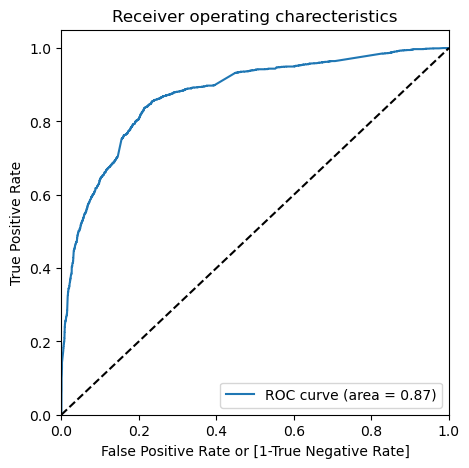

In [1286]:
draw_roc(y_train_pred_final.Converted,y_train_pred_final.Conversion_Prob)

In [1287]:
# The area under the curve is 0.87 which is a good value

In [1288]:
# Creating Columns with different probability cutoffs
numbers = [float(x)/10 for x in range(10)]
for i in numbers:
    y_train_pred_final[i]=y_train_pred_final.Conversion_Prob.map(lambda x: 1 if x>i else 0)
y_train_pred_final.head()

,Converted,Conversion_Prob,Predicted,0.0,0.1,0.2,0.3,0.4,0.5,0.6,0.7,0.8,0.9
0,0,0.125158,0,1,1,0,0,0,0,0,0,0,0
1,0,0.358930,0,1,1,1,1,0,0,0,0,0,0
2,1,0.217227,0,1,1,1,0,0,0,0,0,0,0
3,0,0.035048,0,1,0,0,0,0,0,0,0,0,0
4,0,0.085974,0,1,0,0,0,0,0,0,0,0,0


In [1289]:
# Creating a dataframe to see the value of accuracy, sensitivity and specificity at different values of probability cutoffs
df_cutoff_prob=pd.DataFrame(columns=['probs','accuracy','sensitivity','specificity'])

In [1290]:
for i in numbers:
    cm1=metrics.confusion_matrix(y_train_pred_final.Converted,y_train_pred_final[i])
    total1=sum(sum(cm1))
    accuracy=(cm1[0,0]+cm1[1,1])/total1
    specificity=cm1[0,0]/(cm1[0,0]+cm1[0,1])
    sensitivity=cm1[1,1]/(cm1[1,0]+cm1[1,1])
    df_cutoff_prob.loc[i]=[i,accuracy,sensitivity,specificity]
df_cutoff_prob

,probs,accuracy,sensitivity,specificity
0.0,0.0,0.381500,1.000000,0.000000
0.1,0.1,0.586984,0.957869,0.358217
0.2,0.2,0.760006,0.887237,0.681529
0.3,0.3,0.801450,0.845105,0.774522
0.4,0.4,0.805704,0.784800,0.818599
0.5,0.5,0.800977,0.663775,0.885605
0.6,0.6,0.794989,0.577447,0.929172
0.7,0.7,0.782225,0.505576,0.952866
0.8,0.8,0.755121,0.401487,0.973248
0.9,0.9,0.710054,0.257745,0.989045


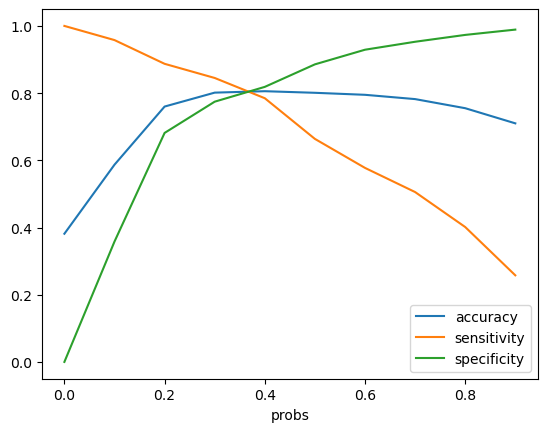

In [1291]:
#plotting the above dataframe
df_cutoff_prob.plot.line(x='probs',y=['accuracy','sensitivity','specificity'])
plt.show()

In [1292]:
#From the graph we can see the approximate value of cuttoff is 0.35

In [1293]:
y_train_pred_final['final_predicted']=y_train_pred_final.Conversion_Prob.map(lambda x: 1 if x>0.35 else 0)
y_train_pred_final.head()

,Converted,Conversion_Prob,Predicted,0.0,0.1,0.2,0.3,0.4,0.5,0.6,0.7,0.8,0.9,final_predicted
0,0,0.125158,0,1,1,0,0,0,0,0,0,0,0,0
1,0,0.358930,0,1,1,1,1,0,0,0,0,0,0,1
2,1,0.217227,0,1,1,1,0,0,0,0,0,0,0,0
3,0,0.035048,0,1,0,0,0,0,0,0,0,0,0,0
4,0,0.085974,0,1,0,0,0,0,0,0,0,0,0,0


In [1294]:
#Now checking the overall accuracy
metrics.accuracy_score(y_train_pred_final.Converted,y_train_pred_final.final_predicted)

0.8046013236684526

In [1295]:
# Creating Confusion metrics
confusion2= metrics.confusion_matrix(y_train_pred_final.Converted,y_train_pred_final.final_predicted)
confusion2

array([[3122,  803],
       [ 437, 1984]], dtype=int64)

In [1296]:
# Assigning the values to the related terms
TP=confusion2[1,1]
TN=confusion2[0,0]
FP=confusion2[0,1]
FN=confusion2[1,0]

In [1297]:
# Sensitivity
TP/(TP+FN)

0.8194960760016522

In [1298]:
# Specificity
TN/(TN+FP)

0.7954140127388535

In [1299]:
# With cutoff 0.35 we get good values
#accuracy=80%
#Sensitivity=80%
#Specificity=80%

## Prediction on test data

In [1300]:
# Scaling Numerical values
x_test[['TotalVisits','Page Views Per Visit','Total Time Spent on Website']]=scaler.transform(x_test[['TotalVisits','Page Views Per Visit','Total Time Spent on Website']])

In [1301]:
col=x_train.columns

In [1302]:
# selecting x_test columns similar to x_train
x_test=x_test[col]

In [1303]:
# Adding a constant
x_test_sm=sm.add_constant(x_test[col])
x_test_sm

,const,TotalVisits,Total Time Spent on Website,Page Views Per Visit,Lead Origin_lead add form,Lead Source_welingak website,Do Not Email_yes,What is your current occupation_working professional,Last Notable Activity_email link clicked,Last Notable Activity_email opened,Last Notable Activity_modified,Last Notable Activity_olark chat conversation,Last Notable Activity_page visited on website
7823,1.0,0.261905,0.529489,0.098125,0,0,0,1,0,0,1,0,0
9073,1.0,0.047619,0.076144,0.125000,0,0,0,0,0,0,0,0,0
925,1.0,0.142857,0.491637,0.375000,0,0,0,0,0,0,1,0,0
2863,1.0,0.071429,0.010563,0.187500,0,0,0,0,0,0,1,0,0
3185,1.0,0.000000,0.000000,0.000000,1,0,0,0,0,0,1,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...
7374,1.0,0.166667,0.140405,0.437500,0,0,0,0,0,0,0,0,0
8266,1.0,0.023810,0.223592,0.062500,0,0,0,0,0,0,1,0,0
4517,1.0,0.000000,0.000000,0.000000,0,0,0,0,0,0,1,0,0
1289,1.0,0.047619,0.612676,0.125000,0,0,0,0,0,1,0,0,0


In [1304]:
# predicting on test set
y_test_pred= res.predict(x_test_sm)

In [1305]:
# converting predicted test to dataframe
y_pred_df=pd.DataFrame(y_test_pred)

In [1306]:
# Converting y_test to dataframe
y_test_df=pd.DataFrame(y_test)

In [1307]:
# Removing indexes and concatinating the dataframes
y_pred_df.reset_index(drop=True,inplace=True)
y_test_df.reset_index(drop=True,inplace=True)

In [1308]:
y_pred_final=pd.concat([y_test_df,y_pred_df],axis=1)

In [1309]:
y_pred_final

,Converted,0
0,1,0.955765
1,0,0.469914
2,1,0.275223
3,0,0.065992
4,1,0.774895
...,...,...
2716,0,0.400766
2717,0,0.176711
2718,0,0.085974
2719,1,0.670476


In [1310]:
#renaming column
y_pred_final.rename(columns={0:'Conversion_Prob'},inplace=True)

In [1311]:
# Makinh predictions on cutoff 0.35
y_pred_final['Final_Prediction']=y_pred_final.Conversion_Prob.map(lambda x: 1 if x>0.35 else 0)
y_pred_final

,Converted,Conversion_Prob,Final_Prediction
0,1,0.955765,1
1,0,0.469914,1
2,1,0.275223,0
3,0,0.065992,0
4,1,0.774895,1
...,...,...,...
2716,0,0.400766,1
2717,0,0.176711,0
2718,0,0.085974,0
2719,1,0.670476,1


In [1312]:
# Accuracy
metrics.accuracy_score(y_pred_final['Converted'],y_pred_final.Final_Prediction)

0.7897831679529584

In [1313]:
# Creating Confusion metrics
confusion3= metrics.confusion_matrix(y_pred_final['Converted'],y_pred_final['Final_Prediction'])
confusion3

array([[1336,  373],
       [ 199,  813]], dtype=int64)

In [1314]:
#Substituting values to correct terms
TP=confusion3[1,1]
TN=confusion3[0,0]
FP=confusion3[0,1]
FN=confusion3[1,0]


In [1315]:
# Sensitivity
TP/(TP+FN)

0.8033596837944664

In [1316]:
# Specificity
TN/(TN+FP)

0.7817437097717964

In [1317]:
# We get good values of Accuracy, Sensitivity, Specificity with 0.35 as cutoff
#Accuracy=79%
#Sensitivity=80%
#Specificity=78%

## Precision and Recall

In [1318]:
# Precision on Train data 
confusion2[1,1]/(confusion2[0,1]+confusion2[1,1])

0.7118765697883028

In [1025]:
# Recall on Train data 
confusion2[1,1]/(confusion2[1,0]+confusion2[1,1])

0.8194960760016522

In [1026]:
#with a cutoff of 0.35 we have a precsion of around 71% and recall of 82%

## Precision and Recall tradeoff

In [1027]:
from sklearn.metrics import precision_recall_curve

In [1028]:
p,r, thresholds=precision_recall_curve(y_train_pred_final.Converted,y_train_pred_final.Conversion_Prob)

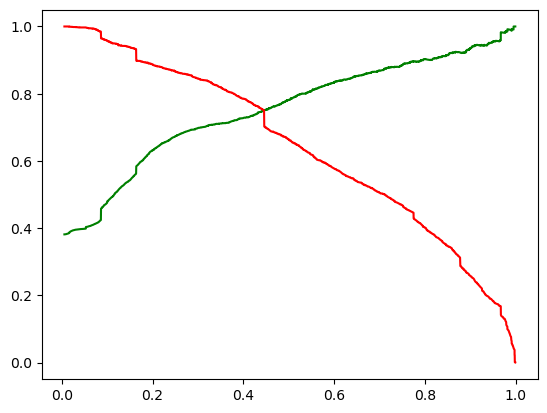

In [1029]:
plt.plot(thresholds,p[:-1],'g-')
plt.plot(thresholds,r[:-1],'r-')
plt.show()

In [1030]:
# From Precision Recall Trade off we can see the optimal value is 0.43

In [1031]:
y_train_pred_final['final_predicted']=y_train_pred_final.Conversion_Prob.map(lambda x: 1 if x>0.43 else 0)

In [1032]:
y_train_pred_final.head()

,Converted,Conversion_Prob,Predicted,0.0,0.1,0.2,0.3,0.4,0.5,0.6,0.7,0.8,0.9,final_predicted
0,0,0.125158,0,1,1,0,0,0,0,0,0,0,0,0
1,0,0.358930,0,1,1,1,1,0,0,0,0,0,0,0
2,1,0.217227,0,1,1,1,0,0,0,0,0,0,0,0
3,0,0.035048,0,1,0,0,0,0,0,0,0,0,0,0
4,0,0.085974,0,1,0,0,0,0,0,0,0,0,0,0


In [1033]:
metrics.accuracy_score(y_train_pred_final['Converted'],y_train_pred_final['final_predicted'])

0.8075953356445005

In [1034]:
confusion4=metrics.confusion_matrix(y_train_pred_final['Converted'],y_train_pred_final['final_predicted'])
confusion4

array([[3277,  648],
       [ 573, 1848]], dtype=int64)

In [1035]:
# Assigning values to correct terms
TP=confusion4[1,1]
TN=confusion4[0,0]
FN=confusion4[1,0]
FP=confusion4[0,1]

In [1036]:
# Precision
TP/(TP+FP)

0.7403846153846154

In [1037]:
#Recall 
TP/(TP+FN)

0.7633209417596035

In [1038]:
# We get a value of 74% for precision and 76% for Recall with cutoff of 0.43

## Prediction on test set

In [1319]:
# Storing prediction of test set in the variable 'y_test_pred'
y_test_pred= res.predict(x_test_sm)
# converting it to df
y_pred_df=pd.DataFrame(y_test_pred)
# converting y_test to dataframe
y_test_df=pd.DataFrame(y_test)
#Remove index for both dataframes to append then side by side
y_pred_df.reset_index(drop=True,inplace=True)
y_test_df.reset_index(drop=True,inplace=True)
# Append y_test_df and y_pred_df
y_pred_final=pd.concat([y_test_df,y_pred_df],axis=1)
#Renaming columns
y_pred_final=y_pred_final.rename(columns={0:'Conversion_Prob'})

In [1320]:
y_pred_final

,Converted,Conversion_Prob
0,1,0.955765
1,0,0.469914
2,1,0.275223
3,0,0.065992
4,1,0.774895
...,...,...
2716,0,0.400766
2717,0,0.176711
2718,0,0.085974
2719,1,0.670476


In [1321]:
# Making predictions using cutoff 0.43
y_pred_final['final_predicted']=y_pred_final['Conversion_Prob'].map(lambda x: 1 if x>0.43 else 0)

In [1322]:
y_pred_final

,Converted,Conversion_Prob,final_predicted
0,1,0.955765,1
1,0,0.469914,1
2,1,0.275223,0
3,0,0.065992,0
4,1,0.774895,1
...,...,...,...
2716,0,0.400766,0
2717,0,0.176711,0
2718,0,0.085974,0
2719,1,0.670476,1


In [1323]:
# Check the overall accuracy
metrics.accuracy_score(y_pred_final['Converted'],y_pred_final['final_predicted'])

0.7975009187798603

In [1324]:
confusion5=metrics.confusion_matrix(y_pred_final['Converted'],y_pred_final['final_predicted'])

In [1325]:
confusion5

array([[1417,  292],
       [ 259,  753]], dtype=int64)

In [1326]:
# Assigning values to correct terms
TP=confusion5[1,1]
TN=confusion5[0,0]
FN=confusion5[1,0]
FP=confusion5[0,1]

In [1327]:
# Precision
TP/(TP+FP)

0.7205741626794259

In [1328]:
#Recall
TP/(TP+FN)

0.7440711462450593

In [315]:
#With the current cutoff as 0.43 we have precision of 72% and Recall of 74% which is a good number

In [1329]:
#Finding most important parameters
res.params.sort_values(ascending=False)

Total Time Spent on Website                             4.182301
Lead Origin_lead add form                               3.599970
TotalVisits                                             2.917519
What is your current occupation_working professional    2.740139
Lead Source_welingak website                            2.603102
const                                                  -0.218734
Last Notable Activity_email opened                     -1.413109
Do Not Email_yes                                       -1.734233
Last Notable Activity_email link clicked               -1.981542
Last Notable Activity_page visited on website          -2.141112
Last Notable Activity_modified                         -2.145074
Last Notable Activity_olark chat conversation          -2.666556
Page Views Per Visit                                   -2.873164
dtype: float64

## Conclusion

In [ ]:
# It was found that the variables that matters the most in building the regression model
# 1. Total Time Spent on Website- This shows more the person is researching on the website and spending time on the website is a lead which has more chances to be converted
# 2. TotalVisits- This shows more the number of times a customer visits the website more is the possibility of the conversion
# 3. When lead source is from welingak website then there is a high chance of lead been converted to customer(learner).
# 4. When Last Notable Activity is email opened, olark chat conversation, page visited on website or sms sent then there is a high chance of lead been converted to customer(learner).
# 5. There is a high chances of conversion when Lead origin is lead add form
# 6. There is a high chances of conversion when the current occupation of the potential customer working professional. 
# 7. Page Viewed per visit alse shows how much a person is interested in joining the course. The more he researches the more hwe is interested and the more pages he will go through
# Keeping these factors in mind X Education can make best of the profits by converting maximum potential leads to buy there courses.
